In [1]:
import pandas as pd
import random
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import math
import statistics as stat
from scipy.stats import norm
import numpy as np
import pprint

# ***1- Team Analysis and Rating***

***Axis9 : GoalKeeping Stats***

In Order to execute this notebook tou should upload the following files :

- gk_tottenham_stats.xlsx
- all_gk_stats.xlsx
- all_players_wages.xlsx

In [2]:
df = pd.read_excel('/content/gk_tottenham_stats.xlsx')
df

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Squad,# Pl,90s,GA,PKA,FK,CK,OG,PSxG,PSxG/SoT,...,PAvgLen,GKAtt,GKLaunch%,AvgLen,Opp,CStp,Stp%,#OPA,#OPA/90,AvgDist
0,Arsenal,1,38.0,43,3,0,6,1,40.0,0.28,...,33.3,153,59.5,49.2,381,22,5.8,43,1.13,16.1
1,Aston Villa,2,38.0,46,5,1,9,4,42.8,0.25,...,37.6,240,51.7,41.4,528,65,12.3,76,2.00,14.2
2,Bournemouth,2,38.0,71,6,0,16,3,63.6,0.29,...,31.9,349,62.2,44.3,739,40,5.4,30,0.79,10.5
3,Brentford,1,38.0,46,2,0,9,3,48.0,0.24,...,39.5,269,70.3,51.8,598,52,8.7,54,1.42,15.8
4,Brighton,2,38.0,53,6,0,6,6,42.7,0.27,...,28.9,186,27.4,28.8,355,27,7.6,32,0.84,12.3
5,Chelsea,2,38.0,47,1,1,8,3,47.0,0.30,...,27.6,245,37.6,32.3,460,24,5.2,63,1.66,13.7
6,Crystal Palace,3,38.0,49,4,0,8,3,44.7,0.26,...,32.3,267,49.8,38.3,539,29,5.4,40,1.05,13.1
7,Everton,2,38.0,57,5,2,4,0,60.4,0.30,...,34.9,323,71.2,52.6,589,23,3.9,52,1.37,5.0
8,Fulham,2,38.0,53,7,1,8,2,60.1,0.28,...,46.0,257,40.5,37.4,490,36,7.3,48,1.26,14.0
9,Leeds United,2,38.0,78,5,1,7,1,64.1,0.32,...,41.1,274,58.4,44.2,475,36,7.6,69,1.82,11.6


***subaxis9.1 : Goals Against***

In [3]:
dico = df.set_index('Squad')['GA'].to_dict()
d = dico.copy()

In [4]:
di = {
        (np.percentile(list(d.values()),0),np.percentile(list(d.values()),5)): 20,
        (np.percentile(list(d.values()),5),np.percentile(list(d.values()),10)): 19,
        (np.percentile(list(d.values()),10),np.percentile(list(d.values()),15)): 18,
        (np.percentile(list(d.values()),15),np.percentile(list(d.values()),20)):17,
        (np.percentile(list(d.values()),20),np.percentile(list(d.values()),25)): 16,
        (np.percentile(list(d.values()),25),np.percentile(list(d.values()),30)): 15,
        (np.percentile(list(d.values()),30),np.percentile(list(d.values()),35)): 14,
        (np.percentile(list(d.values()),35),np.percentile(list(d.values()),40)):13,
        (np.percentile(list(d.values()),40),np.percentile(list(d.values()),45)): 12,
        (np.percentile(list(d.values()),45),np.percentile(list(d.values()),50)): 11,
        (np.percentile(list(d.values()),50),np.percentile(list(d.values()),55)): 10,
        (np.percentile(list(d.values()),55),np.percentile(list(d.values()),60)):9,
        (np.percentile(list(d.values()),60),np.percentile(list(d.values()),65)):8,
        (np.percentile(list(d.values()),65),np.percentile(list(d.values()),75)):7,
        (np.percentile(list(d.values()),75),np.percentile(list(d.values()),80)):6,
        (np.percentile(list(d.values()),80),np.percentile(list(d.values()),85)):5,
        (np.percentile(list(d.values()),85),np.percentile(list(d.values()),90)):4,
        (np.percentile(list(d.values()),90),np.percentile(list(d.values()),96)):3,
        (np.percentile(list(d.values()),96),np.percentile(list(d.values()),98)):2,
        (np.percentile(list(d.values()),98),np.percentile(list(d.values()),100)):1,
    }

def aux(d,key1,value):
    d[key1] = next((score for age_range, score in di.copy().items() if age_range[0] <= value <= age_range[1]))

In [5]:
ll= d.copy()

for (key,value) in ll.copy().items():
  aux(ll,key,value)

pprint.pprint(ll)
print(f"Mean :{stat.mean(list(ll.values()))}\n")

{'Arsenal': 18,
 'Aston Villa': 16,
 'Bournemouth': 4,
 'Brentford': 16,
 'Brighton': 11,
 'Chelsea': 14,
 'Crystal Palace': 12,
 'Everton': 8,
 'Fulham': 11,
 'Leeds United': 1,
 'Leicester City': 6,
 'Liverpool': 14,
 'Manchester City': 20,
 'Manchester Utd': 18,
 'Newcastle Utd': 20,
 "Nott'ham Forest": 6,
 'Southampton': 3,
 'Tottenham': 7,
 'West Ham': 9,
 'Wolves': 7}
Mean :11.05



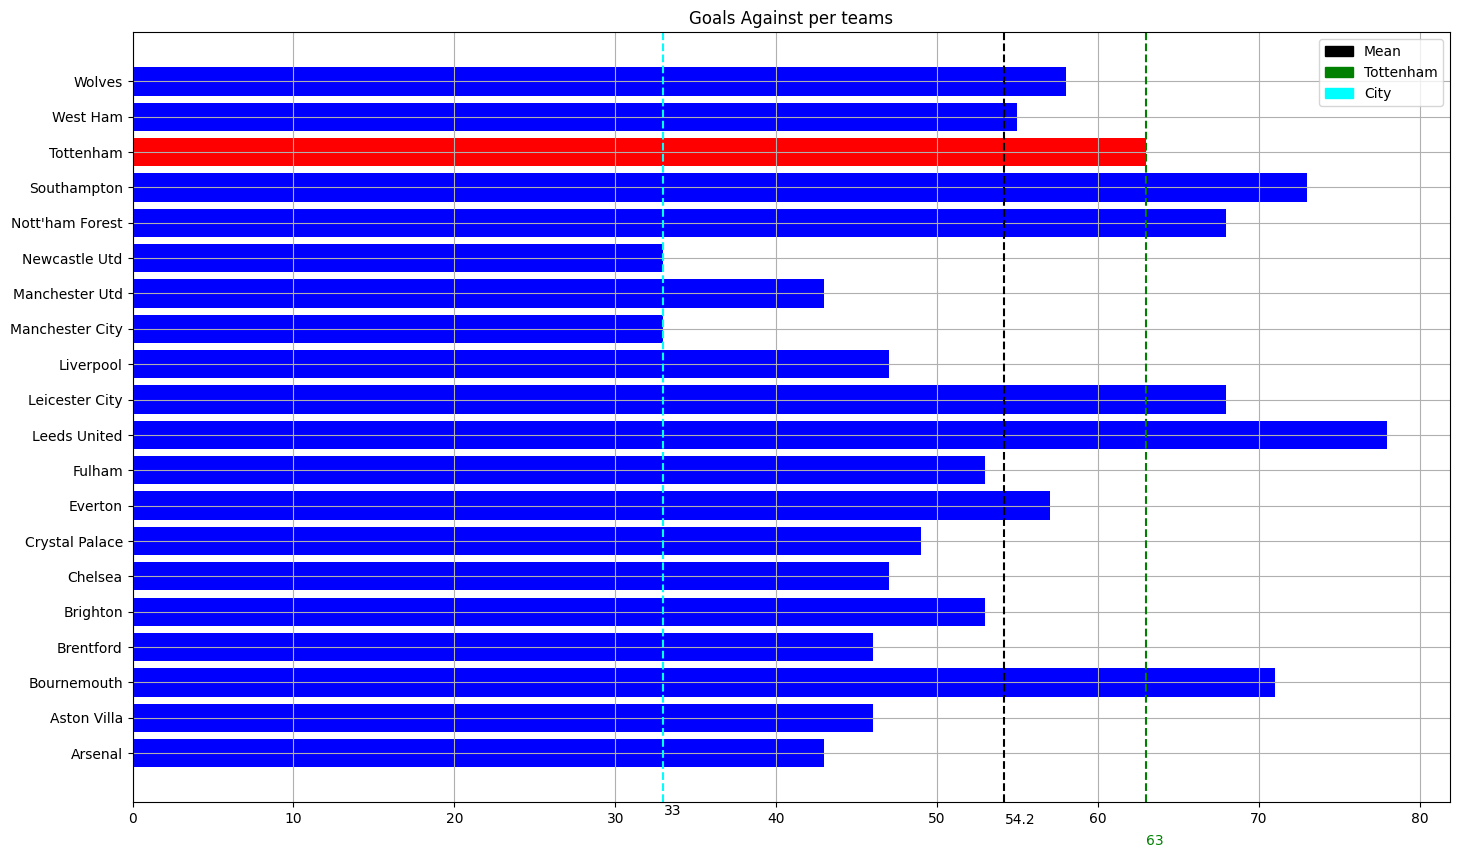

In [6]:
fig, ax = plt.subplots(figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax.barh(list(dico.keys()),list(dico.values()),color=colors)
ax.axvline(stat.mean(list(dico.values())),color='black',linestyle='--')
ax.text(stat.mean(list(dico.values())),-2, f'{stat.mean(list(dico.values()))}',color='black')
ax.axvline(dico["Tottenham"],color='green',linestyle='--')
ax.text(dico["Tottenham"],-2.6, f'{dico["Tottenham"]}',color='green')
ax.axvline(dico["Manchester City"],color='cyan',linestyle='--')
ax.text(dico["Manchester City"],-1.75, f'{dico["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax.legend(handles=[p1,p2,p3])
ax.set_title('Goals Against per teams')
ax.grid(True)

***subaxis9.2 : PSxG+/-***

In [7]:
dico1 = df.set_index('Squad')['PSxG+/-'].to_dict()
d1 = dico1.copy()

In [8]:
di1 = {
        (np.percentile(list(d1.values()),0),np.percentile(list(d1.values()),5)): 1,
        (np.percentile(list(d1.values()),5),np.percentile(list(d1.values()),10)): 2,
        (np.percentile(list(d1.values()),10),np.percentile(list(d1.values()),15)): 3,
        (np.percentile(list(d1.values()),15),np.percentile(list(d1.values()),20)):4,
        (np.percentile(list(d1.values()),20),np.percentile(list(d1.values()),25)): 5,
        (np.percentile(list(d1.values()),25),np.percentile(list(d1.values()),30)): 6,
        (np.percentile(list(d1.values()),30),np.percentile(list(d1.values()),35)): 7,
        (np.percentile(list(d1.values()),35),np.percentile(list(d1.values()),40)):8,
        (np.percentile(list(d1.values()),40),np.percentile(list(d1.values()),45)): 9,
        (np.percentile(list(d1.values()),45),np.percentile(list(d1.values()),50)): 10,
        (np.percentile(list(d1.values()),50),np.percentile(list(d1.values()),55)): 11,
        (np.percentile(list(d1.values()),55),np.percentile(list(d1.values()),60)):12,
        (np.percentile(list(d1.values()),60),np.percentile(list(d1.values()),65)):13,
        (np.percentile(list(d1.values()),65),np.percentile(list(d1.values()),75)):14,
        (np.percentile(list(d1.values()),75),np.percentile(list(d1.values()),80)):15,
        (np.percentile(list(d1.values()),80),np.percentile(list(d1.values()),85)):16,
        (np.percentile(list(d1.values()),85),np.percentile(list(d1.values()),90)):17,
        (np.percentile(list(d1.values()),90),np.percentile(list(d1.values()),96)):18,
        (np.percentile(list(d1.values()),96),np.percentile(list(d1.values()),98)):19,
        (np.percentile(list(d1.values()),98),np.percentile(list(d1.values()),100)):20,
    }

def aux1(d,key1,value):
    d[key1] = next((score for age_range, score in di1.copy().items() if age_range[0] <= value <= age_range[1]))

In [9]:
ll1= d1.copy()

for (key,value) in ll1.copy().items():
  aux1(ll1,key,value)

pprint.pprint(ll1)
print(f"Mean :{stat.mean(list(ll1.values()))}\n")

{'Arsenal': 9,
 'Aston Villa': 14,
 'Bournemouth': 7,
 'Brentford': 17,
 'Brighton': 8,
 'Chelsea': 15,
 'Crystal Palace': 11,
 'Everton': 16,
 'Fulham': 18,
 'Leeds United': 2,
 'Leicester City': 4,
 'Liverpool': 18,
 'Manchester City': 10,
 'Manchester Utd': 13,
 'Newcastle Utd': 14,
 "Nott'ham Forest": 3,
 'Southampton': 1,
 'Tottenham': 5,
 'West Ham': 12,
 'Wolves': 6}
Mean :10.15



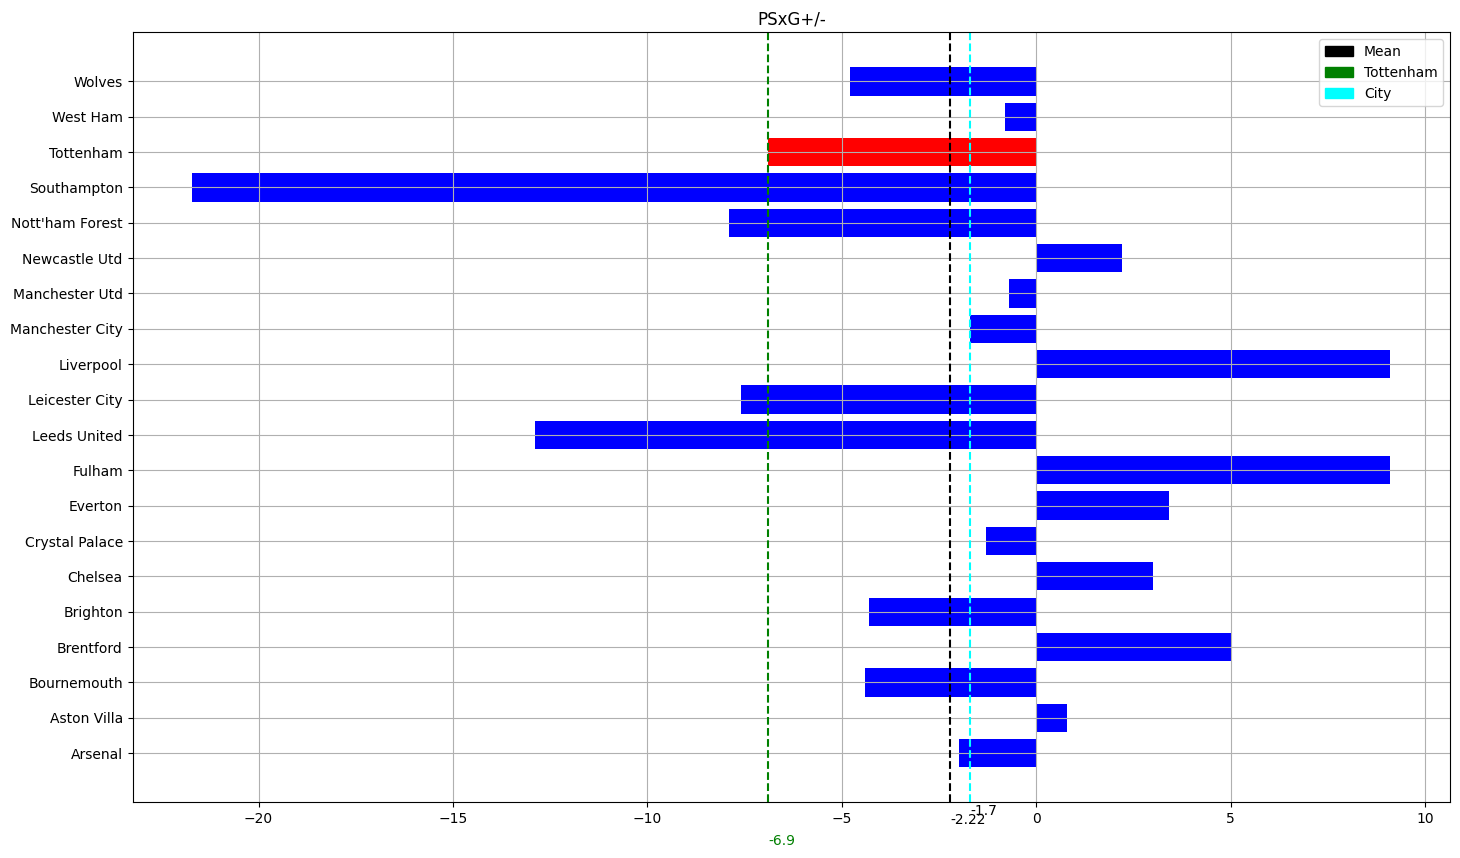

In [10]:
fig, ax = plt.subplots(figsize=(17,10))
colors = []
color = []
for value in list(dico1.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax.barh(list(dico1.keys()),list(dico1.values()),color=colors)
ax.axvline(stat.mean(list(dico1.values())),color='black',linestyle='--')
ax.text(stat.mean(list(dico1.values())),-2, f'{stat.mean(list(dico1.values()))}',color='black')
ax.axvline(dico1["Tottenham"],color='green',linestyle='--')
ax.text(dico1["Tottenham"],-2.6, f'{dico1["Tottenham"]}',color='green')
ax.axvline(dico1["Manchester City"],color='cyan',linestyle='--')
ax.text(dico1["Manchester City"],-1.75, f'{dico1["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax.legend(handles=[p1,p2,p3])
ax.set_title('PSxG+/-')
ax.grid(True)

***subaxis9.3 : PSxG***

In [11]:
dico2 = df.set_index('Squad')['PSxG'].to_dict()
d2 = dico2.copy()

In [12]:
di2 = {
        (np.percentile(list(d2.values()),0),np.percentile(list(d2.values()),5)): 20,
        (np.percentile(list(d2.values()),5),np.percentile(list(d2.values()),10)): 19,
        (np.percentile(list(d2.values()),10),np.percentile(list(d2.values()),15)): 18,
        (np.percentile(list(d2.values()),15),np.percentile(list(d2.values()),20)):17,
        (np.percentile(list(d2.values()),20),np.percentile(list(d2.values()),25)): 16,
        (np.percentile(list(d2.values()),25),np.percentile(list(d2.values()),30)): 15,
        (np.percentile(list(d2.values()),30),np.percentile(list(d2.values()),35)): 14,
        (np.percentile(list(d2.values()),35),np.percentile(list(d2.values()),40)):13,
        (np.percentile(list(d2.values()),40),np.percentile(list(d2.values()),45)): 12,
        (np.percentile(list(d2.values()),45),np.percentile(list(d2.values()),50)): 11,
        (np.percentile(list(d2.values()),50),np.percentile(list(d2.values()),55)): 10,
        (np.percentile(list(d2.values()),55),np.percentile(list(d2.values()),60)):9,
        (np.percentile(list(d2.values()),60),np.percentile(list(d2.values()),65)):8,
        (np.percentile(list(d2.values()),65),np.percentile(list(d2.values()),75)):7,
        (np.percentile(list(d2.values()),75),np.percentile(list(d2.values()),80)):6,
        (np.percentile(list(d2.values()),80),np.percentile(list(d2.values()),85)):5,
        (np.percentile(list(d2.values()),85),np.percentile(list(d2.values()),90)):4,
        (np.percentile(list(d2.values()),90),np.percentile(list(d2.values()),96)):3,
        (np.percentile(list(d2.values()),96),np.percentile(list(d2.values()),98)):2,
        (np.percentile(list(d2.values()),98),np.percentile(list(d2.values()),100)):1,
    }

def aux2(d,key1,value):
    d[key1] = next((score for age_range, score in di2.copy().items() if age_range[0] <= value <= age_range[1]))

In [13]:
ll2= d2.copy()

for (key,value) in ll2.copy().items():
  aux2(ll2,key,value)

pprint.pprint(ll2)
print(f"Mean :{stat.mean(list(ll2.values()))}\n")

{'Arsenal': 18,
 'Aston Villa': 15,
 'Bournemouth': 3,
 'Brentford': 11,
 'Brighton': 16,
 'Chelsea': 12,
 'Crystal Palace': 14,
 'Everton': 4,
 'Fulham': 6,
 'Leeds United': 1,
 'Leicester City': 7,
 'Liverpool': 8,
 'Manchester City': 20,
 'Manchester Utd': 17,
 'Newcastle Utd': 19,
 "Nott'ham Forest": 6,
 'Southampton': 13,
 'Tottenham': 7,
 'West Ham': 9,
 'Wolves': 10}
Mean :10.8



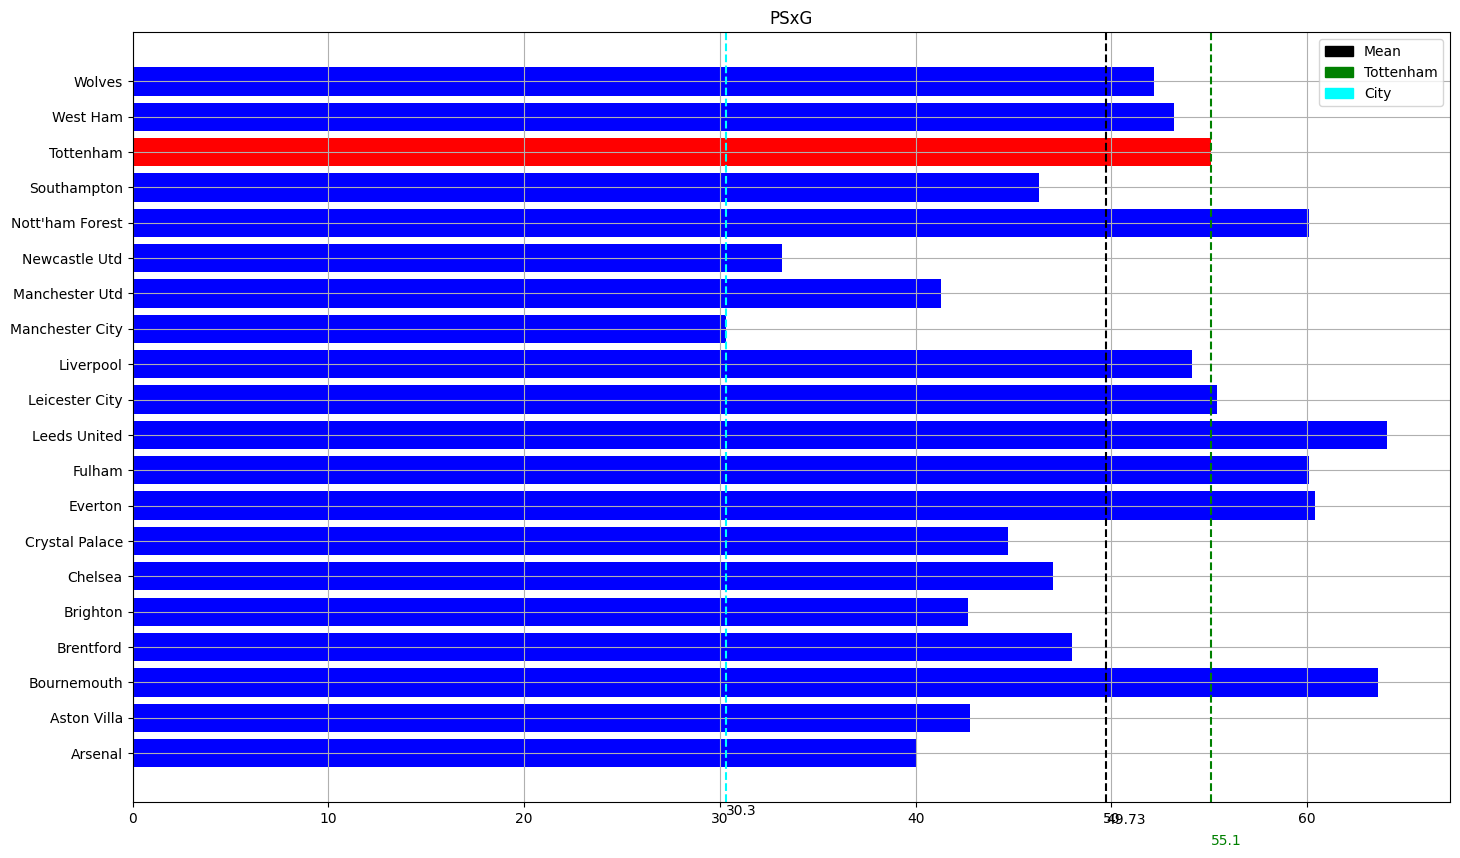

In [14]:
fig, ax = plt.subplots(figsize=(17,10))
colors = []
color = []
for value in list(dico2.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax.barh(list(dico2.keys()),list(dico2.values()),color=colors)
ax.axvline(stat.mean(list(dico2.values())),color='black',linestyle='--')
ax.text(stat.mean(list(dico2.values())),-2, f'{stat.mean(list(dico2.values()))}',color='black')
ax.axvline(dico2["Tottenham"],color='green',linestyle='--')
ax.text(dico2["Tottenham"],-2.6, f'{dico2["Tottenham"]}',color='green')
ax.axvline(dico2["Manchester City"],color='cyan',linestyle='--')
ax.text(dico2["Manchester City"],-1.75, f'{dico2["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax.legend(handles=[p1,p2,p3])
ax.set_title('PSxG')
ax.grid(True)

***subaxis9.4 : Long Pass Completed***

In [15]:
dico3 = df.set_index('Squad')['LCmp'].to_dict()
d3 = dico3.copy()

In [16]:
di3 = {
        (np.percentile(list(d3.values()),0),np.percentile(list(d3.values()),5)): 1,
        (np.percentile(list(d3.values()),5),np.percentile(list(d3.values()),10)): 2,
        (np.percentile(list(d3.values()),10),np.percentile(list(d3.values()),15)): 3,
        (np.percentile(list(d3.values()),15),np.percentile(list(d3.values()),20)):4,
        (np.percentile(list(d3.values()),20),np.percentile(list(d3.values()),25)): 5,
        (np.percentile(list(d3.values()),25),np.percentile(list(d3.values()),30)): 6,
        (np.percentile(list(d3.values()),30),np.percentile(list(d3.values()),35)): 7,
        (np.percentile(list(d3.values()),35),np.percentile(list(d3.values()),40)):8,
        (np.percentile(list(d3.values()),40),np.percentile(list(d3.values()),45)): 9,
        (np.percentile(list(d3.values()),45),np.percentile(list(d3.values()),50)): 10,
        (np.percentile(list(d3.values()),50),np.percentile(list(d3.values()),55)): 11,
        (np.percentile(list(d3.values()),55),np.percentile(list(d3.values()),60)):12,
        (np.percentile(list(d3.values()),60),np.percentile(list(d3.values()),65)):13,
        (np.percentile(list(d3.values()),65),np.percentile(list(d3.values()),75)):14,
        (np.percentile(list(d3.values()),75),np.percentile(list(d3.values()),80)):15,
        (np.percentile(list(d3.values()),80),np.percentile(list(d3.values()),85)):16,
        (np.percentile(list(d3.values()),85),np.percentile(list(d3.values()),90)):17,
        (np.percentile(list(d3.values()),90),np.percentile(list(d3.values()),96)):18,
        (np.percentile(list(d3.values()),96),np.percentile(list(d3.values()),98)):19,
        (np.percentile(list(d3.values()),98),np.percentile(list(d3.values()),100)):20,
    }

def aux3(d,key1,value):
    d[key1] = next((score for age_range, score in di3.copy().items() if age_range[0] <= value <= age_range[1]))

In [17]:
ll3= d3.copy()

for (key,value) in ll3.copy().items():
  aux3(ll3,key,value)

pprint.pprint(ll3)
print(f"Mean :{stat.mean(list(ll3.values()))}\n")

{'Arsenal': 3,
 'Aston Villa': 14,
 'Bournemouth': 15,
 'Brentford': 20,
 'Brighton': 1,
 'Chelsea': 2,
 'Crystal Palace': 13,
 'Everton': 18,
 'Fulham': 11,
 'Leeds United': 6,
 'Leicester City': 10,
 'Liverpool': 5,
 'Manchester City': 8,
 'Manchester Utd': 12,
 'Newcastle Utd': 7,
 "Nott'ham Forest": 17,
 'Southampton': 16,
 'Tottenham': 4,
 'West Ham': 14,
 'Wolves': 9}
Mean :10.25



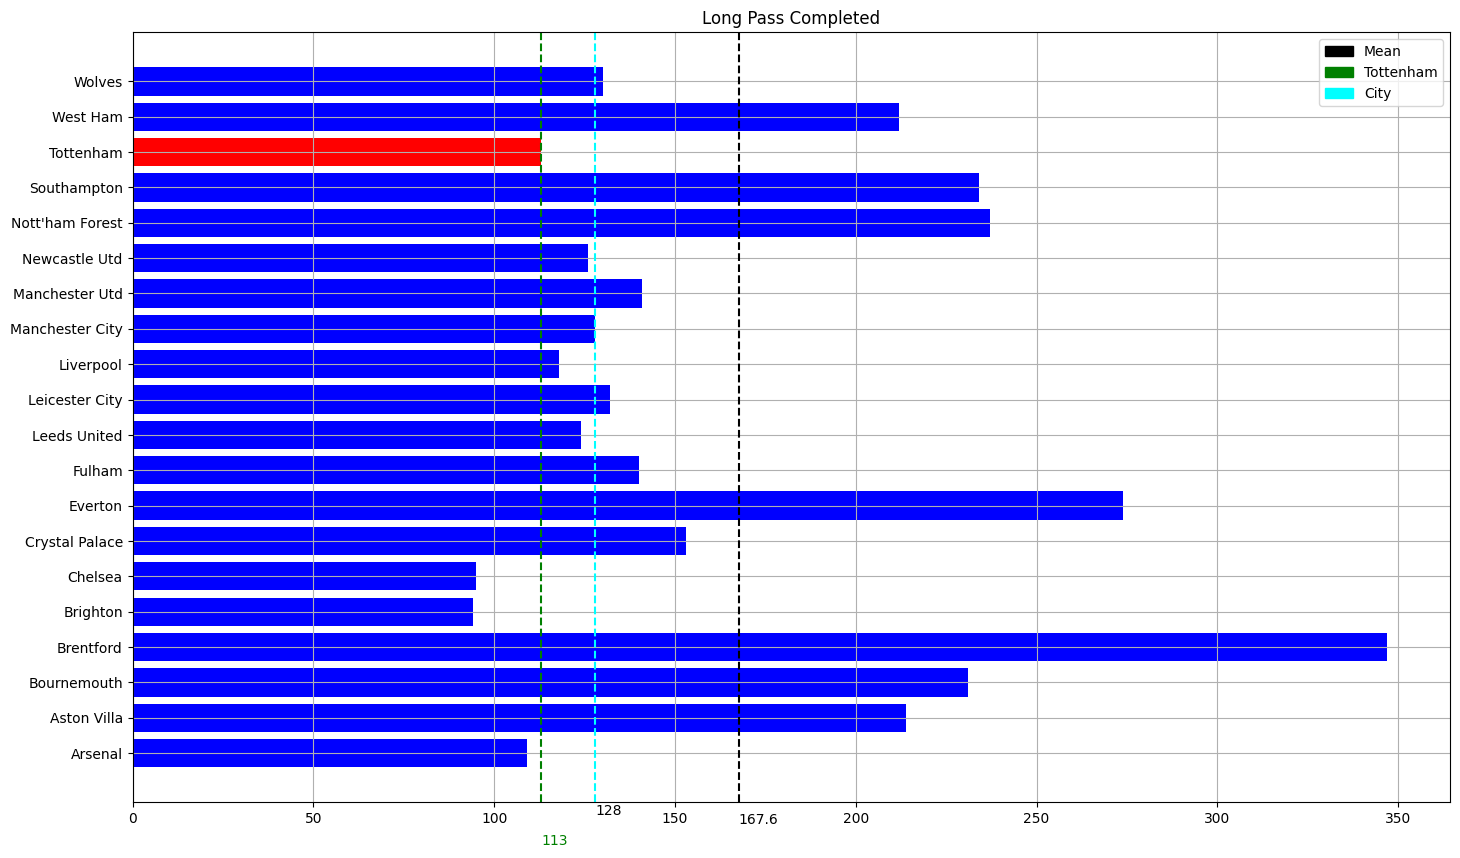

In [18]:
fig, ax = plt.subplots(figsize=(17,10))
colors = []
color = []
for value in list(dico3.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax.barh(list(dico3.keys()),list(dico3.values()),color=colors)
ax.axvline(stat.mean(list(dico3.values())),color='black',linestyle='--')
ax.text(stat.mean(list(dico3.values())),-2, f'{stat.mean(list(dico3.values()))}',color='black')
ax.axvline(dico3["Tottenham"],color='green',linestyle='--')
ax.text(dico3["Tottenham"],-2.6, f'{dico3["Tottenham"]}',color='green')
ax.axvline(dico3["Manchester City"],color='cyan',linestyle='--')
ax.text(dico3["Manchester City"],-1.75, f'{dico3["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax.legend(handles=[p1,p2,p3])
ax.set_title('Long Pass Completed')
ax.grid(True)

***subaxis9.5 : Long Pass Attempted***

In [19]:
dico4 = df.set_index('Squad')['LAtt'].to_dict()
d4 = dico4.copy()

In [20]:
di4 = {
        (np.percentile(list(d4.values()),0),np.percentile(list(d4.values()),5)): 1,
        (np.percentile(list(d4.values()),5),np.percentile(list(d4.values()),10)): 2,
        (np.percentile(list(d4.values()),10),np.percentile(list(d4.values()),15)): 3,
        (np.percentile(list(d4.values()),15),np.percentile(list(d4.values()),20)):4,
        (np.percentile(list(d4.values()),20),np.percentile(list(d4.values()),25)): 5,
        (np.percentile(list(d4.values()),25),np.percentile(list(d4.values()),30)): 6,
        (np.percentile(list(d4.values()),30),np.percentile(list(d4.values()),35)): 7,
        (np.percentile(list(d4.values()),35),np.percentile(list(d4.values()),40)):8,
        (np.percentile(list(d4.values()),40),np.percentile(list(d4.values()),45)): 9,
        (np.percentile(list(d4.values()),45),np.percentile(list(d4.values()),50)): 10,
        (np.percentile(list(d4.values()),50),np.percentile(list(d4.values()),55)): 11,
        (np.percentile(list(d4.values()),55),np.percentile(list(d4.values()),60)):12,
        (np.percentile(list(d4.values()),60),np.percentile(list(d4.values()),65)):13,
        (np.percentile(list(d4.values()),65),np.percentile(list(d4.values()),75)):14,
        (np.percentile(list(d4.values()),75),np.percentile(list(d4.values()),80)):15,
        (np.percentile(list(d4.values()),80),np.percentile(list(d4.values()),85)):16,
        (np.percentile(list(d4.values()),85),np.percentile(list(d4.values()),90)):17,
        (np.percentile(list(d4.values()),90),np.percentile(list(d4.values()),96)):18,
        (np.percentile(list(d4.values()),96),np.percentile(list(d4.values()),98)):19,
        (np.percentile(list(d4.values()),98),np.percentile(list(d4.values()),100)):20,
    }

def aux4(d,key1,value):
    d[key1] = next((score for age_range, score in di4.copy().items() if age_range[0] <= value <= age_range[1]))

In [21]:
ll4= d4.copy()

for (key,value) in ll4.copy().items():
  aux4(ll4,key,value)

pprint.pprint(ll4)
print(f"Mean :{stat.mean(list(ll4.values()))}\n")

{'Arsenal': 7,
 'Aston Villa': 14,
 'Bournemouth': 15,
 'Brentford': 20,
 'Brighton': 1,
 'Chelsea': 4,
 'Crystal Palace': 9,
 'Everton': 18,
 'Fulham': 8,
 'Leeds United': 13,
 'Leicester City': 12,
 'Liverpool': 2,
 'Manchester City': 3,
 'Manchester Utd': 10,
 'Newcastle Utd': 6,
 "Nott'ham Forest": 16,
 'Southampton': 17,
 'Tottenham': 5,
 'West Ham': 14,
 'Wolves': 11}
Mean :10.25



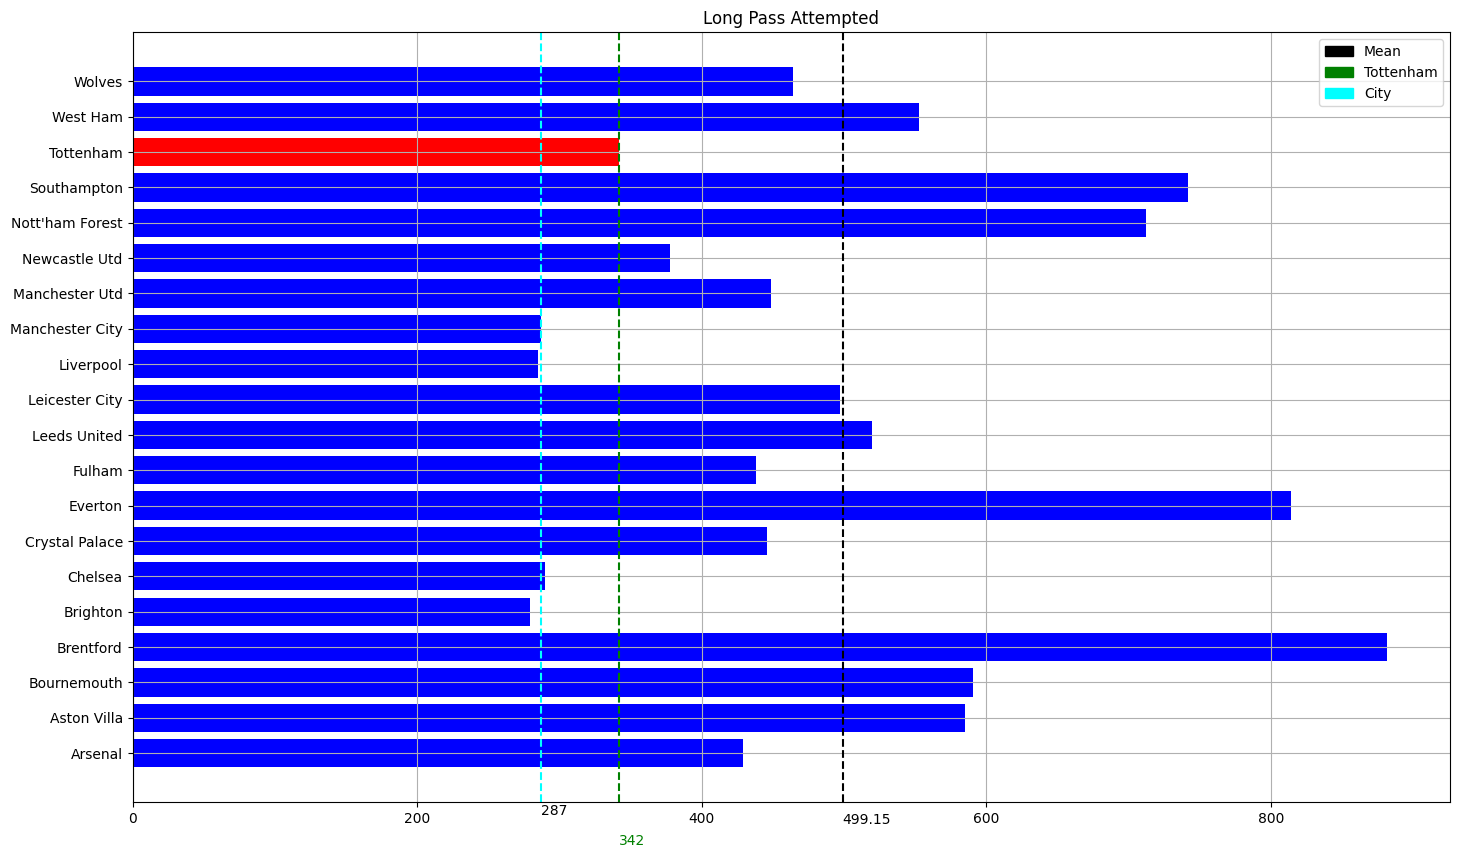

In [22]:
fig, ax = plt.subplots(figsize=(17,10))
colors = []
color = []
for value in list(dico4.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax.barh(list(dico4.keys()),list(dico4.values()),color=colors)
ax.axvline(stat.mean(list(dico4.values())),color='black',linestyle='--')
ax.text(stat.mean(list(dico4.values())),-2, f'{stat.mean(list(dico4.values()))}',color='black')
ax.axvline(dico4["Tottenham"],color='green',linestyle='--')
ax.text(dico4["Tottenham"],-2.6, f'{dico4["Tottenham"]}',color='green')
ax.axvline(dico4["Manchester City"],color='cyan',linestyle='--')
ax.text(dico4["Manchester City"],-1.75, f'{dico4["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax.legend(handles=[p1,p2,p3])
ax.set_title('Long Pass Attempted')
ax.grid(True)

***subaxis9.6 : Pass Attempted***

In [23]:
dico5 = df.set_index('Squad')['PAtt'].to_dict()
d5 = dico5.copy()

In [24]:
di5 = {
        (np.percentile(list(d5.values()),0),np.percentile(list(d5.values()),5)): 1,
        (np.percentile(list(d5.values()),5),np.percentile(list(d5.values()),10)): 2,
        (np.percentile(list(d5.values()),10),np.percentile(list(d5.values()),15)): 3,
        (np.percentile(list(d5.values()),15),np.percentile(list(d5.values()),20)):4,
        (np.percentile(list(d5.values()),20),np.percentile(list(d5.values()),25)): 5,
        (np.percentile(list(d5.values()),25),np.percentile(list(d5.values()),30)): 6,
        (np.percentile(list(d5.values()),30),np.percentile(list(d5.values()),35)): 7,
        (np.percentile(list(d5.values()),35),np.percentile(list(d5.values()),40)):8,
        (np.percentile(list(d5.values()),40),np.percentile(list(d5.values()),45)): 9,
        (np.percentile(list(d5.values()),45),np.percentile(list(d5.values()),50)): 10,
        (np.percentile(list(d5.values()),50),np.percentile(list(d5.values()),55)): 11,
        (np.percentile(list(d5.values()),55),np.percentile(list(d5.values()),60)):12,
        (np.percentile(list(d5.values()),60),np.percentile(list(d5.values()),65)):13,
        (np.percentile(list(d5.values()),65),np.percentile(list(d5.values()),75)):14,
        (np.percentile(list(d5.values()),75),np.percentile(list(d5.values()),80)):15,
        (np.percentile(list(d5.values()),80),np.percentile(list(d5.values()),85)):16,
        (np.percentile(list(d5.values()),85),np.percentile(list(d5.values()),90)):17,
        (np.percentile(list(d5.values()),90),np.percentile(list(d5.values()),96)):18,
        (np.percentile(list(d5.values()),96),np.percentile(list(d5.values()),98)):19,
        (np.percentile(list(d5.values()),98),np.percentile(list(d5.values()),100)):20,
    }

def aux5(d,key1,value):
    d[key1] = next((score for age_range, score in di5.copy().items() if age_range[0] <= value <= age_range[1]))

In [25]:
ll5= d5.copy()

for (key,value) in ll5.copy().items():
  aux5(ll5,key,value)

pprint.pprint(ll5)
print(f"Mean :{stat.mean(list(ll5.values()))}\n")

{'Arsenal': 7,
 'Aston Villa': 17,
 'Bournemouth': 4,
 'Brentford': 20,
 'Brighton': 14,
 'Chelsea': 13,
 'Crystal Palace': 6,
 'Everton': 11,
 'Fulham': 15,
 'Leeds United': 5,
 'Leicester City': 10,
 'Liverpool': 18,
 'Manchester City': 16,
 'Manchester Utd': 12,
 'Newcastle Utd': 1,
 "Nott'ham Forest": 8,
 'Southampton': 14,
 'Tottenham': 3,
 'West Ham': 2,
 'Wolves': 9}
Mean :10.25



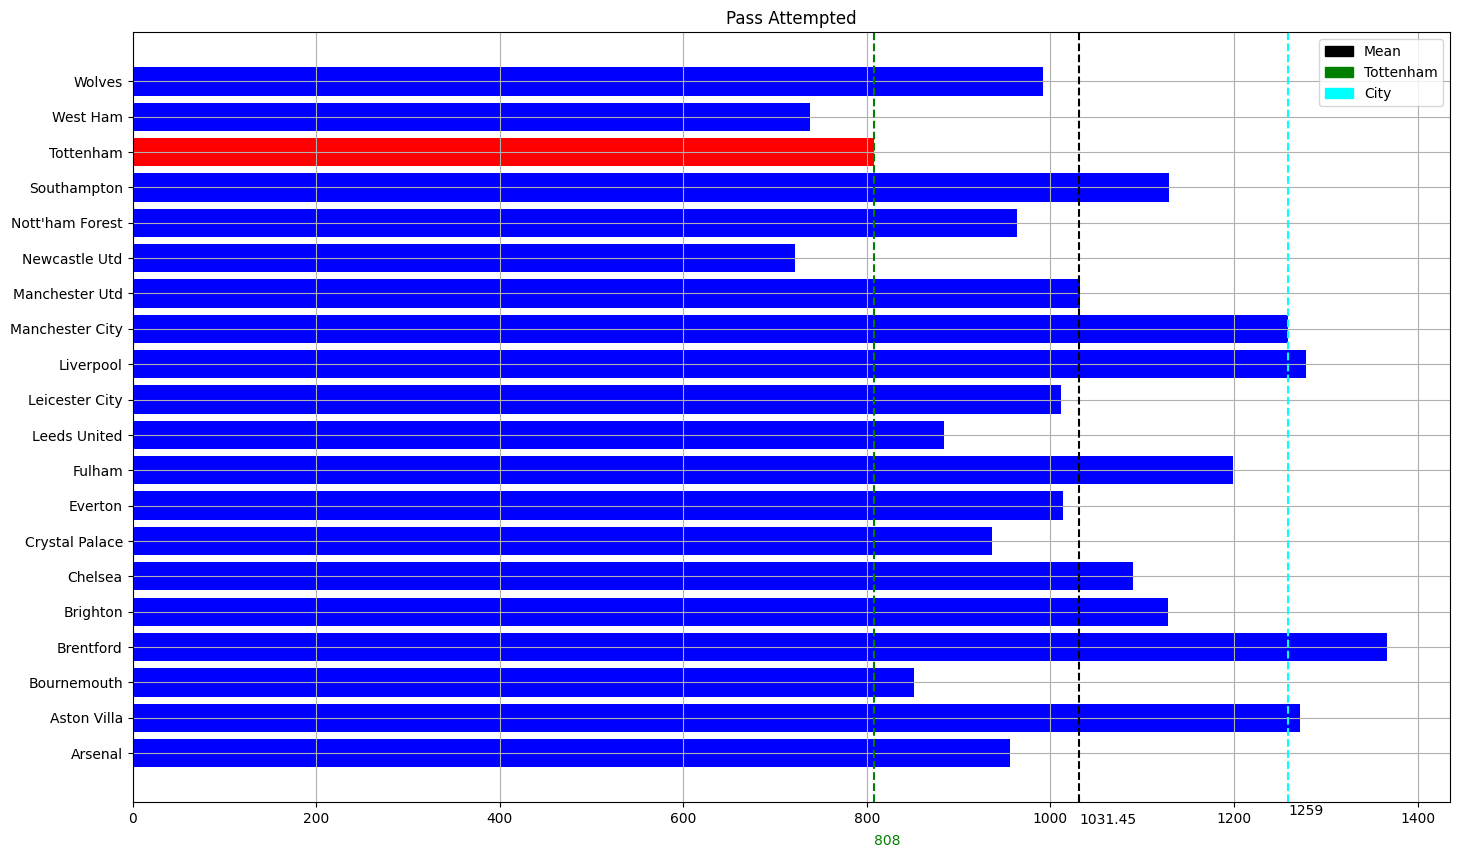

In [26]:
fig, ax = plt.subplots(figsize=(17,10))
colors = []
color = []
for value in list(dico5.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax.barh(list(dico5.keys()),list(dico5.values()),color=colors)
ax.axvline(stat.mean(list(dico5.values())),color='black',linestyle='--')
ax.text(stat.mean(list(dico5.values())),-2, f'{stat.mean(list(dico5.values()))}',color='black')
ax.axvline(dico5["Tottenham"],color='green',linestyle='--')
ax.text(dico5["Tottenham"],-2.6, f'{dico5["Tottenham"]}',color='green')
ax.axvline(dico5["Manchester City"],color='cyan',linestyle='--')
ax.text(dico5["Manchester City"],-1.75, f'{dico5["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax.legend(handles=[p1,p2,p3])
ax.set_title('Pass Attempted')
ax.grid(True)

***subaxis9.7 : Pass Average Length***

In [27]:
dico6 = df.set_index('Squad')['PAvgLen'].to_dict()
d6 = dico6.copy()

In [28]:
di6 = {
        (np.percentile(list(d6.values()),0),np.percentile(list(d6.values()),5)): 1,
        (np.percentile(list(d6.values()),5),np.percentile(list(d6.values()),10)): 2,
        (np.percentile(list(d6.values()),10),np.percentile(list(d6.values()),15)): 3,
        (np.percentile(list(d6.values()),15),np.percentile(list(d6.values()),20)):4,
        (np.percentile(list(d6.values()),20),np.percentile(list(d6.values()),25)): 5,
        (np.percentile(list(d6.values()),25),np.percentile(list(d6.values()),30)): 6,
        (np.percentile(list(d6.values()),30),np.percentile(list(d6.values()),35)): 7,
        (np.percentile(list(d6.values()),35),np.percentile(list(d6.values()),40)):8,
        (np.percentile(list(d6.values()),40),np.percentile(list(d6.values()),45)): 9,
        (np.percentile(list(d6.values()),45),np.percentile(list(d6.values()),50)): 10,
        (np.percentile(list(d6.values()),50),np.percentile(list(d6.values()),55)): 11,
        (np.percentile(list(d6.values()),55),np.percentile(list(d6.values()),60)):12,
        (np.percentile(list(d6.values()),60),np.percentile(list(d6.values()),65)):13,
        (np.percentile(list(d6.values()),65),np.percentile(list(d6.values()),75)):14,
        (np.percentile(list(d6.values()),75),np.percentile(list(d6.values()),80)):15,
        (np.percentile(list(d6.values()),80),np.percentile(list(d6.values()),85)):16,
        (np.percentile(list(d6.values()),85),np.percentile(list(d6.values()),90)):17,
        (np.percentile(list(d6.values()),90),np.percentile(list(d6.values()),96)):18,
        (np.percentile(list(d6.values()),96),np.percentile(list(d6.values()),98)):19,
        (np.percentile(list(d6.values()),98),np.percentile(list(d6.values()),100)):20,
    }

def aux6(d,key1,value):
    d[key1] = next((score for age_range, score in di6.copy().items() if age_range[0] <= value <= age_range[1]))

In [29]:
ll6= d6.copy()

for (key,value) in ll6.copy().items():
  aux6(ll6,key,value)

pprint.pprint(ll6)
print(f"Mean :{stat.mean(list(ll6.values()))}\n")

{'Arsenal': 11,
 'Aston Villa': 15,
 'Bournemouth': 7,
 'Brentford': 16,
 'Brighton': 5,
 'Chelsea': 3,
 'Crystal Palace': 8,
 'Everton': 13,
 'Fulham': 20,
 'Leeds United': 17,
 'Leicester City': 14,
 'Liverpool': 2,
 'Manchester City': 4,
 'Manchester Utd': 8,
 'Newcastle Utd': 1,
 "Nott'ham Forest": 18,
 'Southampton': 14,
 'Tottenham': 6,
 'West Ham': 12,
 'Wolves': 10}
Mean :10.2



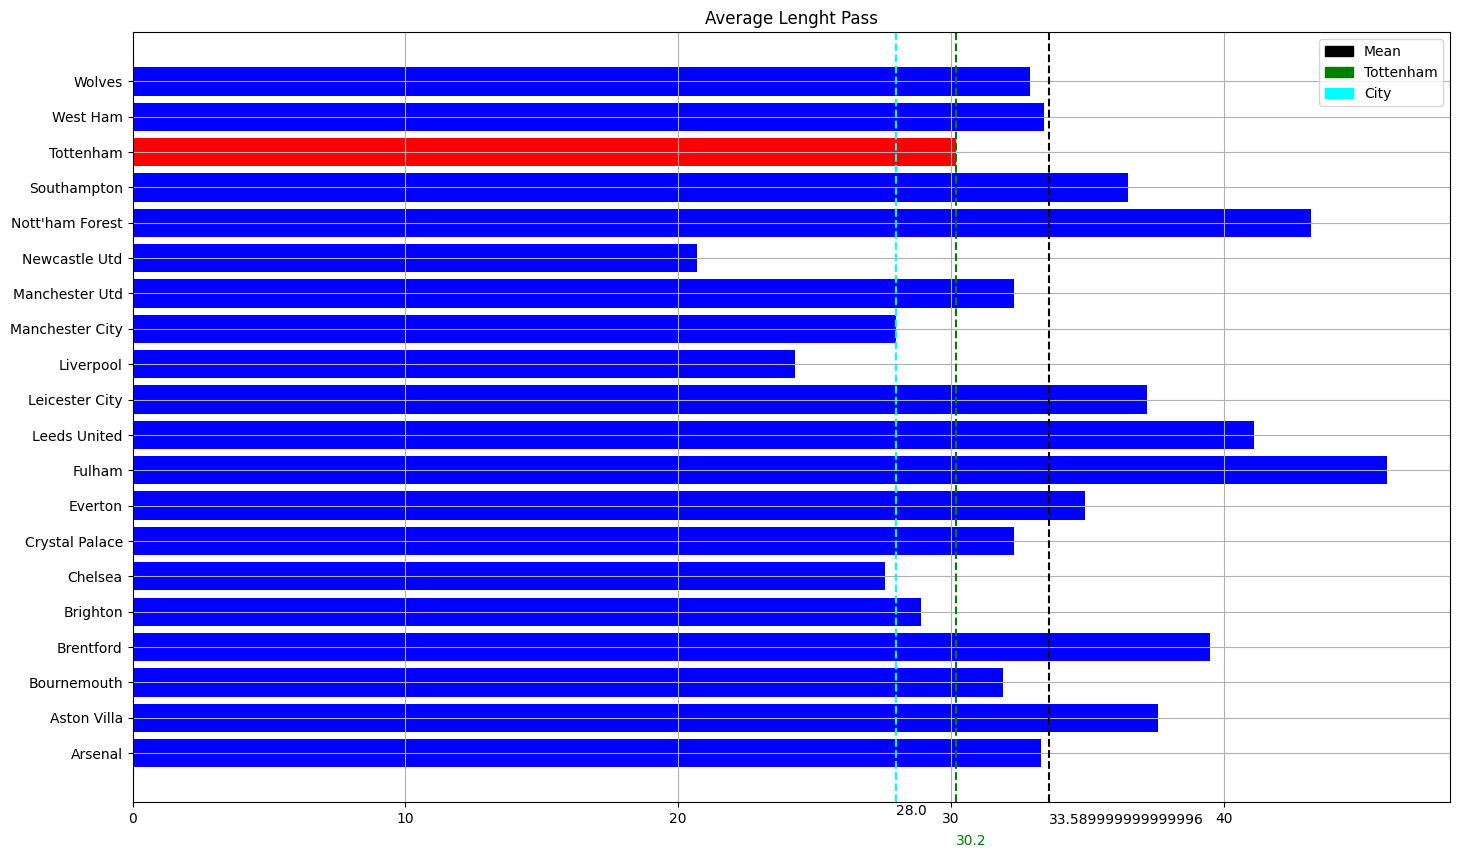

In [30]:
fig, ax = plt.subplots(figsize=(17,10))
colors = []
color = []
for value in list(dico6.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax.barh(list(dico6.keys()),list(dico6.values()),color=colors)
ax.axvline(stat.mean(list(dico6.values())),color='black',linestyle='--')
ax.text(stat.mean(list(dico6.values())),-2, f'{stat.mean(list(dico6.values()))}',color='black')
ax.axvline(dico6["Tottenham"],color='green',linestyle='--')
ax.text(dico6["Tottenham"],-2.6, f'{dico6["Tottenham"]}',color='green')
ax.axvline(dico6["Manchester City"],color='cyan',linestyle='--')
ax.text(dico6["Manchester City"],-1.75, f'{dico6["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax.legend(handles=[p1,p2,p3])
ax.set_title('Average Lenght Pass')
ax.grid(True)

***subaxis9.8 : Goal Kicks Attempted**

In [31]:
dico7 = df.set_index('Squad')['GKAtt'].to_dict()
d7 = dico7.copy()

In [32]:
di7 = {
        (np.percentile(list(d7.values()),0),np.percentile(list(d7.values()),5)): 1,
        (np.percentile(list(d7.values()),5),np.percentile(list(d7.values()),10)): 2,
        (np.percentile(list(d7.values()),10),np.percentile(list(d7.values()),15)): 3,
        (np.percentile(list(d7.values()),15),np.percentile(list(d7.values()),20)):4,
        (np.percentile(list(d7.values()),20),np.percentile(list(d7.values()),25)): 5,
        (np.percentile(list(d7.values()),25),np.percentile(list(d7.values()),30)): 6,
        (np.percentile(list(d7.values()),30),np.percentile(list(d7.values()),35)): 7,
        (np.percentile(list(d7.values()),35),np.percentile(list(d7.values()),40)):8,
        (np.percentile(list(d7.values()),40),np.percentile(list(d7.values()),45)): 9,
        (np.percentile(list(d7.values()),45),np.percentile(list(d7.values()),50)): 10,
        (np.percentile(list(d7.values()),50),np.percentile(list(d7.values()),55)): 11,
        (np.percentile(list(d7.values()),55),np.percentile(list(d7.values()),60)):12,
        (np.percentile(list(d7.values()),60),np.percentile(list(d7.values()),65)):13,
        (np.percentile(list(d7.values()),65),np.percentile(list(d7.values()),75)):14,
        (np.percentile(list(d7.values()),75),np.percentile(list(d7.values()),80)):15,
        (np.percentile(list(d7.values()),80),np.percentile(list(d7.values()),85)):16,
        (np.percentile(list(d7.values()),85),np.percentile(list(d7.values()),90)):17,
        (np.percentile(list(d7.values()),90),np.percentile(list(d7.values()),96)):18,
        (np.percentile(list(d7.values()),96),np.percentile(list(d7.values()),98)):19,
        (np.percentile(list(d7.values()),98),np.percentile(list(d7.values()),100)):20,
    }

def aux7(d,key1,value):
    d[key1] = next((score for age_range, score in di7.copy().items() if age_range[0] <= value <= age_range[1]))

In [33]:
ll7= d7.copy()

for (key,value) in ll7.copy().items():
  aux7(ll7,key,value)

pprint.pprint(ll7)
print(f"Mean :{stat.mean(list(ll7.values()))}\n")

{'Arsenal': 1,
 'Aston Villa': 7,
 'Bournemouth': 20,
 'Brentford': 11,
 'Brighton': 4,
 'Chelsea': 8,
 'Crystal Palace': 10,
 'Everton': 17,
 'Fulham': 9,
 'Leeds United': 12,
 'Leicester City': 16,
 'Liverpool': 5,
 'Manchester City': 2,
 'Manchester Utd': 3,
 'Newcastle Utd': 6,
 "Nott'ham Forest": 18,
 'Southampton': 15,
 'Tottenham': 13,
 'West Ham': 13,
 'Wolves': 14}
Mean :10.2



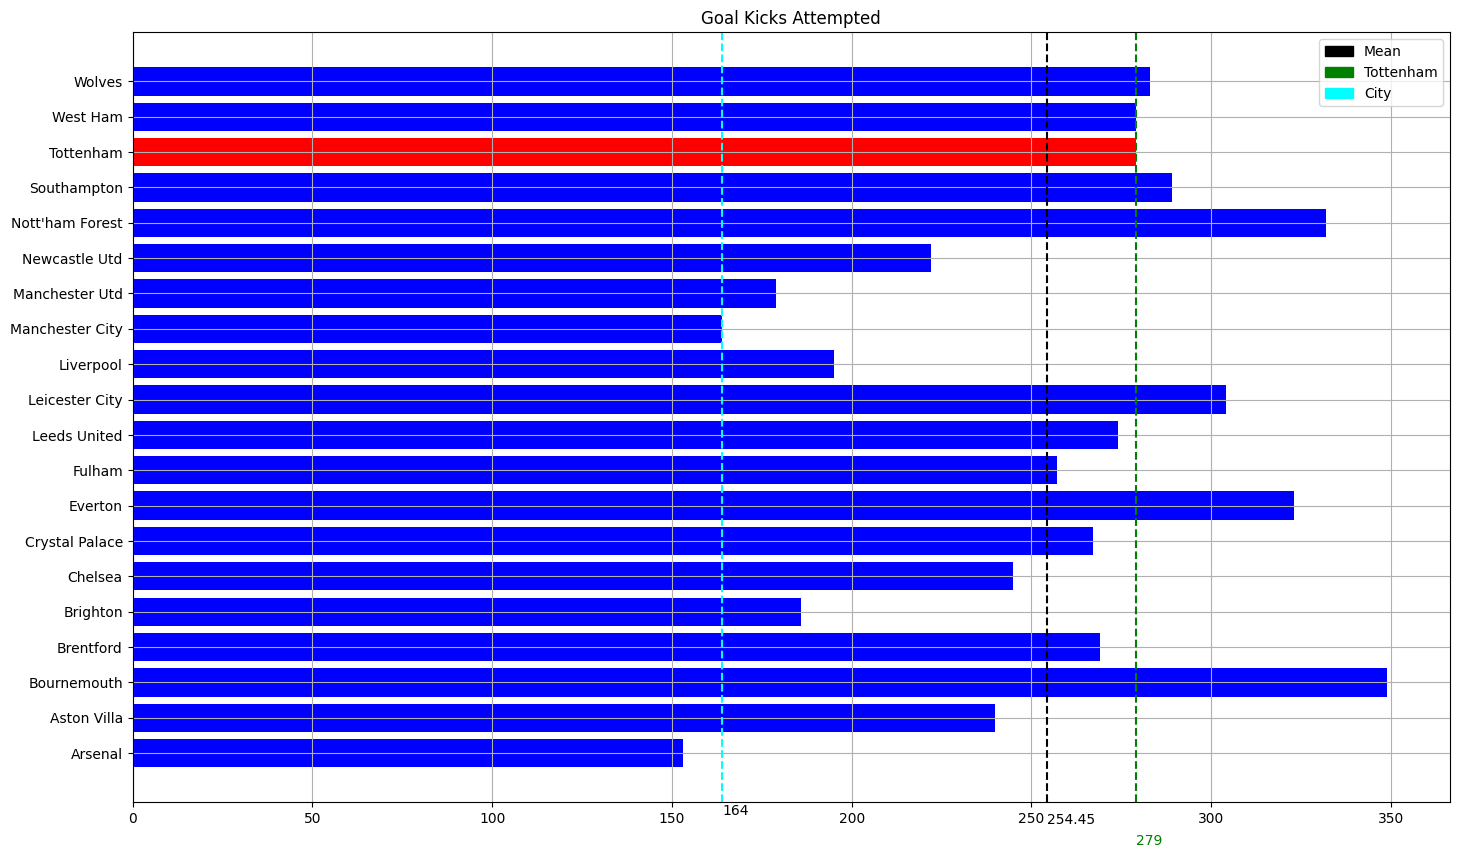

In [34]:
fig, ax = plt.subplots(figsize=(17,10))
colors = []
color = []
for value in list(dico7.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax.barh(list(dico7.keys()),list(dico7.values()),color=colors)
ax.axvline(stat.mean(list(dico7.values())),color='black',linestyle='--')
ax.text(stat.mean(list(dico7.values())),-2, f'{stat.mean(list(dico7.values()))}',color='black')
ax.axvline(dico7["Tottenham"],color='green',linestyle='--')
ax.text(dico7["Tottenham"],-2.6, f'{dico7["Tottenham"]}',color='green')
ax.axvline(dico7["Manchester City"],color='cyan',linestyle='--')
ax.text(dico7["Manchester City"],-1.75, f'{dico7["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax.legend(handles=[p1,p2,p3])
ax.set_title('Goal Kicks Attempted')
ax.grid(True)

***subaxis9.9 : Goal Kicks Launched %***

In [35]:
dico8 = df.set_index('Squad')['GKLaunch%'].to_dict()
d8 = dico8.copy()

In [36]:
di8 = {
        (np.percentile(list(d8.values()),0),np.percentile(list(d8.values()),5)): 1,
        (np.percentile(list(d8.values()),5),np.percentile(list(d8.values()),10)): 2,
        (np.percentile(list(d8.values()),10),np.percentile(list(d8.values()),15)): 3,
        (np.percentile(list(d8.values()),15),np.percentile(list(d8.values()),20)):4,
        (np.percentile(list(d8.values()),20),np.percentile(list(d8.values()),25)): 5,
        (np.percentile(list(d8.values()),25),np.percentile(list(d8.values()),30)): 6,
        (np.percentile(list(d8.values()),30),np.percentile(list(d8.values()),35)): 7,
        (np.percentile(list(d8.values()),35),np.percentile(list(d8.values()),40)):8,
        (np.percentile(list(d8.values()),40),np.percentile(list(d8.values()),45)): 9,
        (np.percentile(list(d8.values()),45),np.percentile(list(d8.values()),50)): 10,
        (np.percentile(list(d8.values()),50),np.percentile(list(d8.values()),55)): 11,
        (np.percentile(list(d8.values()),55),np.percentile(list(d8.values()),60)):12,
        (np.percentile(list(d8.values()),60),np.percentile(list(d8.values()),65)):13,
        (np.percentile(list(d8.values()),65),np.percentile(list(d8.values()),75)):14,
        (np.percentile(list(d8.values()),75),np.percentile(list(d8.values()),80)):15,
        (np.percentile(list(d8.values()),80),np.percentile(list(d8.values()),85)):16,
        (np.percentile(list(d8.values()),85),np.percentile(list(d8.values()),90)):17,
        (np.percentile(list(d8.values()),90),np.percentile(list(d8.values()),96)):18,
        (np.percentile(list(d8.values()),96),np.percentile(list(d8.values()),98)):19,
        (np.percentile(list(d8.values()),98),np.percentile(list(d8.values()),100)):20,
    }

def aux8(d,key1,value):
    d[key1] = next((score for age_range, score in di8.copy().items() if age_range[0] <= value <= age_range[1]))

In [37]:
ll8= d8.copy()

for (key,value) in ll8.copy().items():
  aux8(ll8,key,value)

pprint.pprint(ll8)
print(f"Mean :{stat.mean(list(ll8.values()))}\n")

{'Arsenal': 13,
 'Aston Villa': 9,
 'Bournemouth': 14,
 'Brentford': 18,
 'Brighton': 2,
 'Chelsea': 5,
 'Crystal Palace': 8,
 'Everton': 20,
 'Fulham': 6,
 'Leeds United': 11,
 'Leicester City': 7,
 'Liverpool': 1,
 'Manchester City': 3,
 'Manchester Utd': 15,
 'Newcastle Utd': 17,
 "Nott'ham Forest": 16,
 'Southampton': 14,
 'Tottenham': 4,
 'West Ham': 10,
 'Wolves': 12}
Mean :10.25



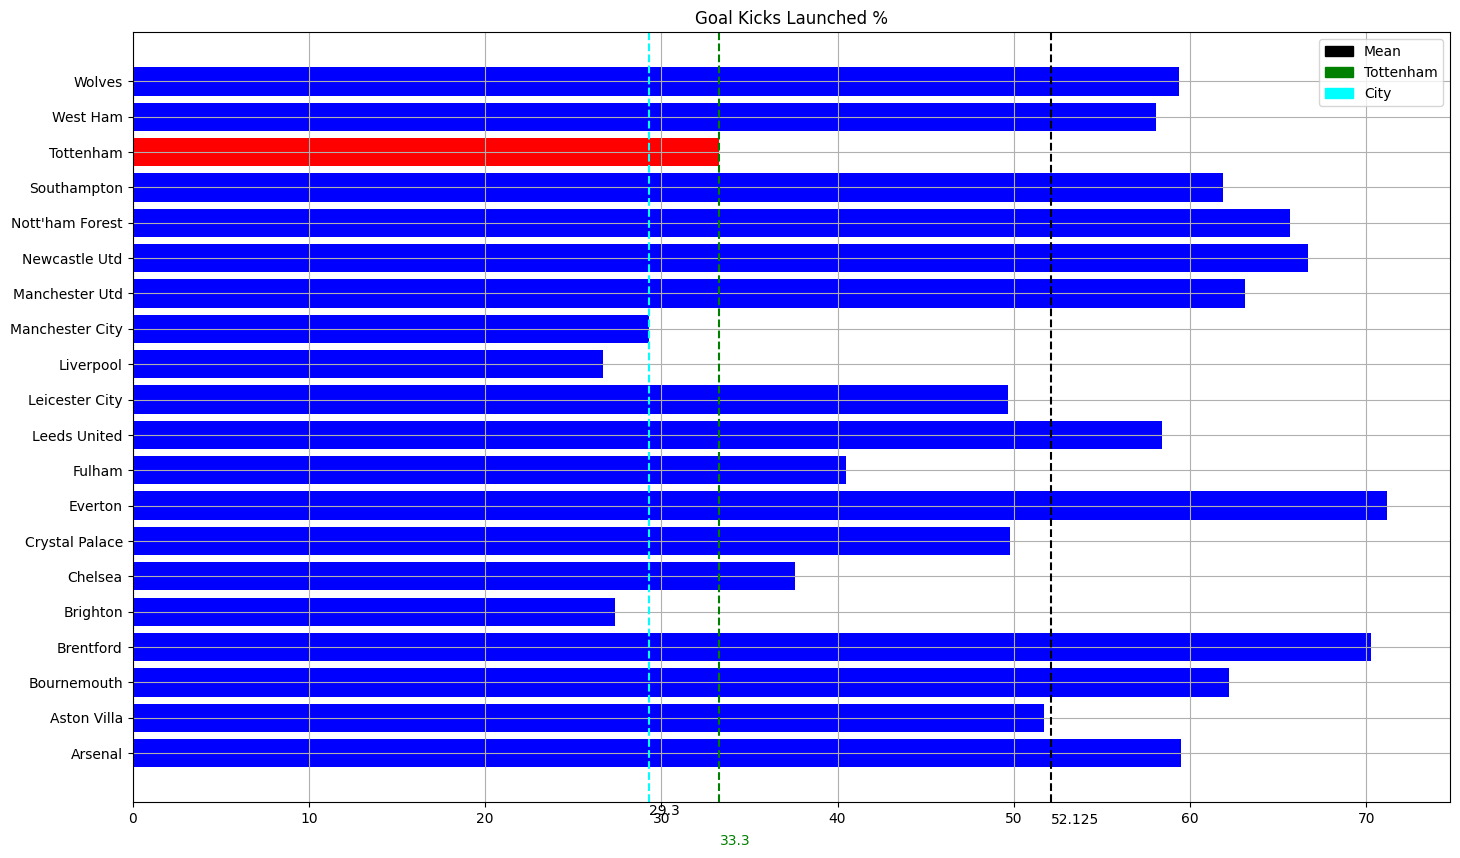

In [38]:
fig, ax = plt.subplots(figsize=(17,10))
colors = []
color = []
for value in list(dico8.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax.barh(list(dico8.keys()),list(dico8.values()),color=colors)
ax.axvline(stat.mean(list(dico8.values())),color='black',linestyle='--')
ax.text(stat.mean(list(dico8.values())),-2, f'{stat.mean(list(dico8.values()))}',color='black')
ax.axvline(dico8["Tottenham"],color='green',linestyle='--')
ax.text(dico8["Tottenham"],-2.6, f'{dico8["Tottenham"]}',color='green')
ax.axvline(dico8["Manchester City"],color='cyan',linestyle='--')
ax.text(dico8["Manchester City"],-1.75, f'{dico8["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax.legend(handles=[p1,p2,p3])
ax.set_title('Goal Kicks Launched %')
ax.grid(True)

***subaxis9.10 : Cross Stopped***

In [39]:
dico9 = df.set_index('Squad')['CStp'].to_dict()
d9 = dico9.copy()

In [40]:
di9 = {
        (np.percentile(list(d9.values()),0),np.percentile(list(d9.values()),5)): 1,
        (np.percentile(list(d9.values()),5),np.percentile(list(d9.values()),10)): 2,
        (np.percentile(list(d9.values()),10),np.percentile(list(d9.values()),15)): 3,
        (np.percentile(list(d9.values()),15),np.percentile(list(d9.values()),20)):4,
        (np.percentile(list(d9.values()),20),np.percentile(list(d9.values()),25)): 5,
        (np.percentile(list(d9.values()),25),np.percentile(list(d9.values()),30)): 6,
        (np.percentile(list(d9.values()),30),np.percentile(list(d9.values()),35)): 7,
        (np.percentile(list(d9.values()),35),np.percentile(list(d9.values()),40)):8,
        (np.percentile(list(d9.values()),40),np.percentile(list(d9.values()),45)): 9,
        (np.percentile(list(d9.values()),45),np.percentile(list(d9.values()),50)): 10,
        (np.percentile(list(d9.values()),50),np.percentile(list(d9.values()),55)): 11,
        (np.percentile(list(d9.values()),55),np.percentile(list(d9.values()),60)):12,
        (np.percentile(list(d9.values()),60),np.percentile(list(d9.values()),65)):13,
        (np.percentile(list(d9.values()),65),np.percentile(list(d9.values()),75)):14,
        (np.percentile(list(d9.values()),75),np.percentile(list(d9.values()),80)):15,
        (np.percentile(list(d9.values()),80),np.percentile(list(d9.values()),85)):16,
        (np.percentile(list(d9.values()),85),np.percentile(list(d9.values()),90)):17,
        (np.percentile(list(d9.values()),90),np.percentile(list(d9.values()),96)):18,
        (np.percentile(list(d9.values()),96),np.percentile(list(d9.values()),98)):19,
        (np.percentile(list(d9.values()),98),np.percentile(list(d9.values()),100)):20,
    }

def aux9(d,key1,value):
    d[key1] = next((score for age_range, score in di9.copy().items() if age_range[0] <= value <= age_range[1]))

In [41]:
ll9= d9.copy()

for (key,value) in ll9.copy().items():
  aux9(ll9,key,value)

pprint.pprint(ll9)
print(f"Mean :{stat.mean(list(ll9.values()))}\n")

{'Arsenal': 3,
 'Aston Villa': 20,
 'Bournemouth': 15,
 'Brentford': 18,
 'Brighton': 8,
 'Chelsea': 6,
 'Crystal Palace': 9,
 'Everton': 4,
 'Fulham': 13,
 'Leeds United': 13,
 'Leicester City': 13,
 'Liverpool': 4,
 'Manchester City': 2,
 'Manchester Utd': 1,
 'Newcastle Utd': 11,
 "Nott'ham Forest": 11,
 'Southampton': 16,
 'Tottenham': 7,
 'West Ham': 10,
 'Wolves': 17}
Mean :10.05



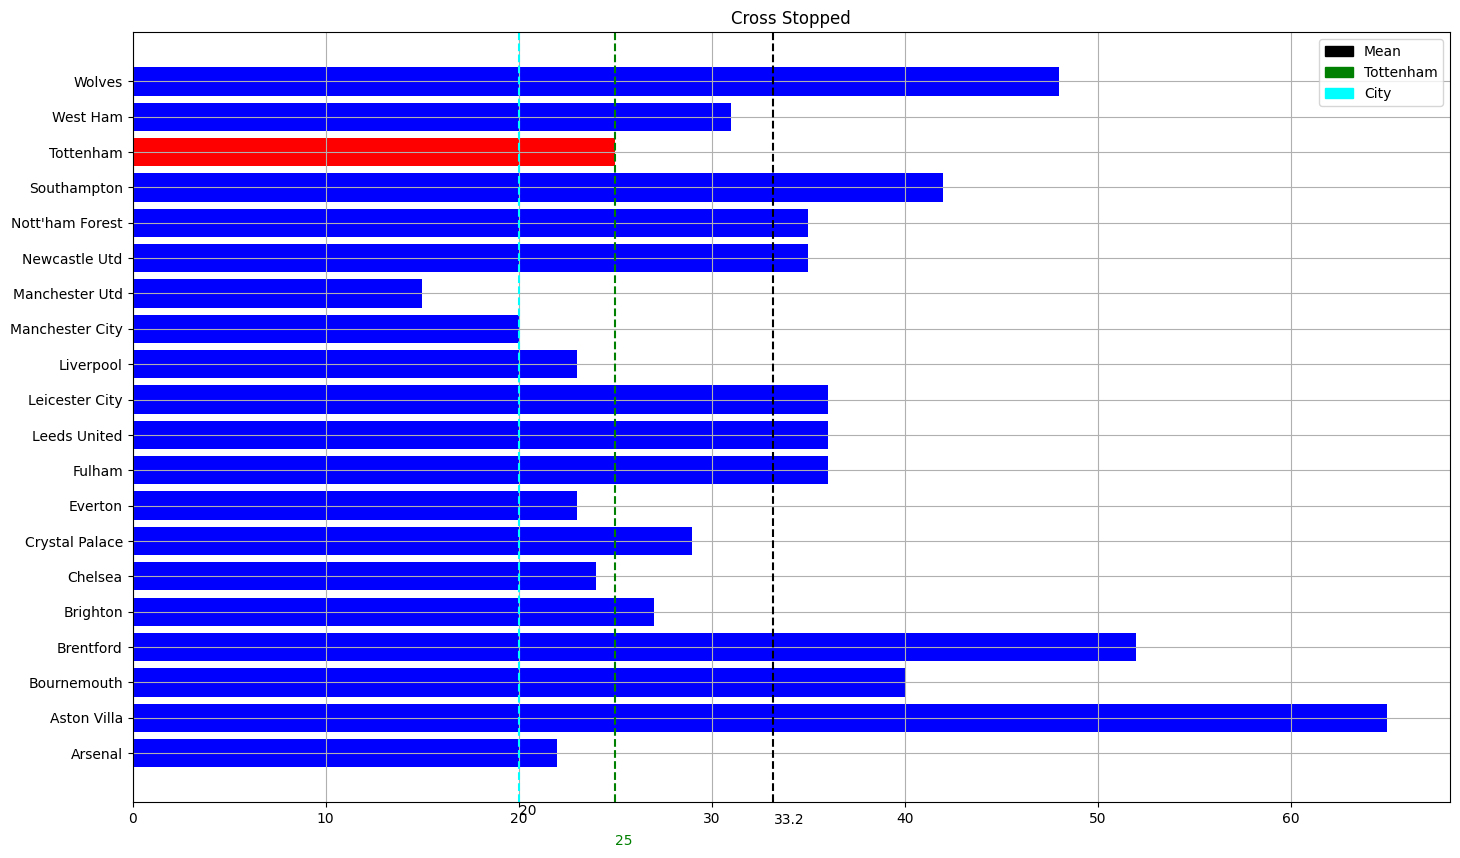

In [42]:
fig, ax = plt.subplots(figsize=(17,10))
colors = []
color = []
for value in list(dico9.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax.barh(list(dico9.keys()),list(dico9.values()),color=colors)
ax.axvline(stat.mean(list(dico9.values())),color='black',linestyle='--')
ax.text(stat.mean(list(dico9.values())),-2, f'{stat.mean(list(dico9.values()))}',color='black')
ax.axvline(dico9["Tottenham"],color='green',linestyle='--')
ax.text(dico9["Tottenham"],-2.6, f'{dico9["Tottenham"]}',color='green')
ax.axvline(dico9["Manchester City"],color='cyan',linestyle='--')
ax.text(dico9["Manchester City"],-1.75, f'{dico9["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax.legend(handles=[p1,p2,p3])
ax.set_title('Cross Stopped')
ax.grid(True)

In [43]:
def moyenne(liste):
  return sum(liste) / len(liste)


def calculer_moyenne(dictionnaires):
  gk_dictionnaire_moyenne = {}
  for clé in dictionnaires[0].keys():
    valeurs = [dictionnaire[clé] for dictionnaire in dictionnaires]
    moyenne_valeur = moyenne(valeurs)
    gk_dictionnaire_moyenne[clé] = moyenne_valeur
  return gk_dictionnaire_moyenne


def afficher_dictionnaire(dictionnaire):
  for clé, valeur in dictionnaire.items():
    print(f"{clé}: {valeur}")


dictionnaires = [ll,ll1,ll2,ll3,ll4,ll5,ll6,ll7,ll8,ll9]

gk_dictionnaire_moyenne = calculer_moyenne(dictionnaires)

gk_dictionnaire_moyenne = dict(sorted(gk_dictionnaire_moyenne.items(), key=lambda item: item[1], reverse=True))

afficher_dictionnaire(gk_dictionnaire_moyenne)

Brentford: 16.7
Aston Villa: 14.1
Everton: 12.9
Southampton: 12.3
Nott'ham Forest: 11.9
Fulham: 11.7
Manchester Utd: 10.9
West Ham: 10.5
Wolves: 10.5
Bournemouth: 10.4
Newcastle Utd: 10.2
Crystal Palace: 10.0
Leicester City: 9.9
Arsenal: 9.0
Manchester City: 8.8
Chelsea: 8.2
Leeds United: 8.1
Liverpool: 7.7
Brighton: 7.0
Tottenham: 6.1


# ***2-Player Rating and Selection***

In [44]:
data = pd.read_excel('/content/all_gk_stats.xlsx')
dicttt = data.set_index('Player')['Squad'].to_dict()
g = data.set_index('Player')['90s'].to_dict()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [45]:
def replace_nan_values_with_l_keys(l):
  """Returns a new dictionary containing the original list, with NaN values replaced by 0, and using the keys of l as the keys of the dictionary."""
  dictionary = {}
  for key, value in l.items():
    if math.isnan(value):
      dictionary[key] = 0
    else:
      dictionary[key] = value
  return dictionary

***subaxis9.1 : Goals Against***

In [46]:
gk = data.set_index('Player')['GA'].to_dict()
gkb = replace_nan_values_with_l_keys(gk)
g = gkb.copy()

In [47]:
gi = {
        (np.percentile(list(g.values()),0),np.percentile(list(g.values()),5)): 20,
        (np.percentile(list(g.values()),5),np.percentile(list(g.values()),10)): 19,
        (np.percentile(list(g.values()),10),np.percentile(list(g.values()),15)):18,
        (np.percentile(list(g.values()),15),np.percentile(list(g.values()),20)):17,
        (np.percentile(list(g.values()),20),np.percentile(list(g.values()),25)):16,
        (np.percentile(list(g.values()),25),np.percentile(list(g.values()),30)):15,
        (np.percentile(list(g.values()),30),np.percentile(list(g.values()),35)):14,
        (np.percentile(list(g.values()),35),np.percentile(list(g.values()),40)):13,
        (np.percentile(list(g.values()),40),np.percentile(list(g.values()),45)):12,
        (np.percentile(list(g.values()),45),np.percentile(list(g.values()),50)):11,
        (np.percentile(list(g.values()),50),np.percentile(list(g.values()),55)):10,
        (np.percentile(list(g.values()),55),np.percentile(list(g.values()),60)):9,
        (np.percentile(list(g.values()),60),np.percentile(list(g.values()),65)):8,
        (np.percentile(list(g.values()),65),np.percentile(list(g.values()),75)):7,
        (np.percentile(list(g.values()),75),np.percentile(list(g.values()),80)):6,
        (np.percentile(list(g.values()),80),np.percentile(list(g.values()),85)):5,
        (np.percentile(list(g.values()),85),np.percentile(list(g.values()),90)):4,
        (np.percentile(list(g.values()),90),np.percentile(list(g.values()),96)):3,
        (np.percentile(list(g.values()),96),np.percentile(list(g.values()),98)):2,
        (np.percentile(list(g.values()),98),np.percentile(list(g.values()),100)):1,
    }

def aux10(d,key1,value):
    d[key1] = next((score for age_range, score in gi.copy().items() if age_range[0] <= value <= age_range[1]))

In [48]:
rr= gkb.copy()

for (key,value) in rr.copy().items():
  aux10(rr,key,value)

pprint.pprint(rr)
print(f"Mean :{stat.mean(list(rr.values()))}\n")

{'Aaron Ramsdale': 6,
 'Agustín Marchesín': 9,
 'Aitor Fernández': 12,
 'Alban Lafont': 4,
 'Alessandro Russo': 17,
 'Alessio Cragno': 17,
 'Alex Cordaz': 20,
 'Alex McCarthy': 12,
 'Alex Meret': 10,
 'Alexander Meyer': 13,
 'Alexander Nübel': 3,
 'Alexander Schwolow': 3,
 'Alexandre Letellier': 20,
 'Alisson': 6,
 'Alphonse Areola': 15,
 'Andrea Consigli': 3,
 'Andrey Lunyov': 18,
 'Andriy Lunin': 15,
 'André Onana': 10,
 'Anthony Lopes': 7,
 'Antonio Gomis': 19,
 'Antonio Mirante': 20,
 'Asmir Begović': 20,
 'Axel Werner': 16,
 'Bartłomiej Dr? gowski': 4,
 'Benjamin Lecomte': 11,
 'Benjamin Leroy': 2,
 'Benoît Costil': 6,
 'Bernd Leno': 4,
 'Bingourou Kamara': 14,
 'Brice Samba': 9,
 'Caoimhín Kelleher': 16,
 'Ciprian Tătărușanu': 11,
 'Claudio Bravo': 14,
 'Daniel Bentley': 17,
 'Daniel Iversen': 11,
 'Danny Ward': 5,
 'David Gil': 16,
 'David Raya': 5,
 'David Soria': 5,
 'David de Gea': 6,
 'Dean Henderson': 8,
 'Diant Ramaj': 19,
 'Diego López': 16,
 'Diego Mariño': 18,
 'Dominik

In [49]:
tt0 = rr.copy()
ttt = dicttt.copy()
for (key,value) in tt0.copy().items():
  if value < np.percentile(list(tt0.values()),40) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key] < 20:
    del tt0[key]
pprint.pprint(tt0)

{'Agustín Marchesín': 9,
 'Alex Meret': 10,
 'André Onana': 10,
 'Benjamin Lecomte': 11,
 'Brice Samba': 9,
 'Ciprian Tătărușanu': 11,
 'Daniel Iversen': 11,
 'Fabian Bredlow': 10,
 'Fraser Forster': 10,
 'Frederik Rønnow': 9,
 'Ionuț Radu': 11,
 'Ivan Provedel': 9,
 'Iván Villar': 10,
 'Jan Oblak': 11,
 'Janis Blaswich': 9,
 'Jason Steele': 10,
 'Juan Musso': 9,
 'Marco Sportiello': 11,
 'Mike Maignan': 11,
 'Nicola Ravaglia': 10,
 'Pepe Reina': 9,
 'Robert Sánchez': 9,
 'Sergio Asenjo': 11,
 'Sergio Herrera': 10,
 'Thibaut Courtois': 9,
 'Tomáš Koubek': 11,
 'Vito Mannone': 10,
 'Wojciech Szczęsny': 10,
 'Yvon Mvogo': 9}


***subaxis9.2 : PSxG+/-***

In [50]:
gk1 = data.set_index('Player')['PSxG+/-'].to_dict()
gk1b = replace_nan_values_with_l_keys(gk1)
g1 = gk1b.copy()

In [51]:
gi1 = {
        (np.percentile(list(g1.values()),0),np.percentile(list(g1.values()),5)): 1,
        (np.percentile(list(g1.values()),5),np.percentile(list(g1.values()),10)): 2,
        (np.percentile(list(g1.values()),10),np.percentile(list(g1.values()),15)):3,
        (np.percentile(list(g1.values()),15),np.percentile(list(g1.values()),20)):4,
        (np.percentile(list(g1.values()),20),np.percentile(list(g1.values()),25)):5,
        (np.percentile(list(g1.values()),25),np.percentile(list(g1.values()),30)):6,
        (np.percentile(list(g1.values()),30),np.percentile(list(g1.values()),35)):7,
        (np.percentile(list(g1.values()),35),np.percentile(list(g1.values()),40)):8,
        (np.percentile(list(g1.values()),40),np.percentile(list(g1.values()),45)):9,
        (np.percentile(list(g1.values()),45),np.percentile(list(g1.values()),50)):10,
        (np.percentile(list(g1.values()),50),np.percentile(list(g1.values()),55)):11,
        (np.percentile(list(g1.values()),55),np.percentile(list(g1.values()),60)):12,
        (np.percentile(list(g1.values()),60),np.percentile(list(g1.values()),65)):13,
        (np.percentile(list(g1.values()),65),np.percentile(list(g1.values()),75)):14,
        (np.percentile(list(g1.values()),75),np.percentile(list(g1.values()),80)):15,
        (np.percentile(list(g1.values()),80),np.percentile(list(g1.values()),85)):16,
        (np.percentile(list(g1.values()),85),np.percentile(list(g1.values()),90)):17,
        (np.percentile(list(g1.values()),90),np.percentile(list(g1.values()),96)):18,
        (np.percentile(list(g1.values()),96),np.percentile(list(g1.values()),98)):19,
        (np.percentile(list(g1.values()),98),np.percentile(list(g1.values()),100)):20,
    }

def aux11(d,key1,value):
    d[key1] = next((score for age_range, score in gi1.copy().items() if age_range[0] <= value <= age_range[1]))

In [52]:
rr1= gk1b.copy()

for (key,value) in rr1.copy().items():
  aux11(rr1,key,value)

pprint.pprint(rr1)
print(f"Mean :{stat.mean(list(rr1.values()))}\n")

{'Aaron Ramsdale': 6,
 'Agustín Marchesín': 1,
 'Aitor Fernández': 10,
 'Alban Lafont': 18,
 'Alessandro Russo': 11,
 'Alessio Cragno': 7,
 'Alex Cordaz': 14,
 'Alex McCarthy': 3,
 'Alex Meret': 14,
 'Alexander Meyer': 4,
 'Alexander Nübel': 2,
 'Alexander Schwolow': 1,
 'Alexandre Letellier': 11,
 'Alisson': 20,
 'Alphonse Areola': 13,
 'Andrea Consigli': 1,
 'Andrey Lunyov': 9,
 'Andriy Lunin': 7,
 'André Onana': 4,
 'Anthony Lopes': 18,
 'Antonio Gomis': 10,
 'Antonio Mirante': 11,
 'Asmir Begović': 14,
 'Axel Werner': 7,
 'Bartłomiej Dr? gowski': 3,
 'Benjamin Lecomte': 19,
 'Benjamin Leroy': 1,
 'Benoît Costil': 2,
 'Bernd Leno': 20,
 'Bingourou Kamara': 6,
 'Brice Samba': 18,
 'Caoimhín Kelleher': 8,
 'Ciprian Tătărușanu': 3,
 'Claudio Bravo': 16,
 'Daniel Bentley': 14,
 'Daniel Iversen': 5,
 'Danny Ward': 2,
 'David Gil': 15,
 'David Raya': 18,
 'David Soria': 16,
 'David de Gea': 9,
 'Dean Henderson': 4,
 'Diant Ramaj': 11,
 'Diego López': 5,
 'Diego Mariño': 9,
 'Dominik Greif

In [53]:
tt1 = rr1.copy()
ttt = dicttt.copy()
for (key,value) in tt1.copy().items():
  if value < np.percentile(list(tt1.values()),80) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key] < 20:
    del tt1[key]
pprint.pprint(tt1)

{'Alban Lafont': 18,
 'Alisson': 20,
 'Anthony Lopes': 18,
 'Benjamin Lecomte': 19,
 'Bernd Leno': 20,
 'Brice Samba': 18,
 'David Raya': 18,
 'Emiliano Martínez': 17,
 'Frederik Rønnow': 19,
 'Gianluigi Donnarumma': 18,
 'Gregor Kobel': 17,
 'Jordi Masip': 18,
 'Lucas Chevalier': 16,
 'Luigi Sepe': 18,
 'Marco Bizot': 17,
 'Mark Flekken': 16,
 'Mory Diaw': 20,
 'Paulo Gazzaniga': 19,
 'Yehvann Diouf': 19,
 'Édgar Badía': 20}


***subaxis9.3 : PSxG***

In [54]:
gk2 = data.set_index('Player')['PSxG'].to_dict()
gk2b = replace_nan_values_with_l_keys(gk2)
g2 = gk2b.copy()

In [55]:
gi2 = {
        (np.percentile(list(g2.values()),0),np.percentile(list(g2.values()),5)): 20,
        (np.percentile(list(g2.values()),5),np.percentile(list(g2.values()),10)): 19,
        (np.percentile(list(g2.values()),10),np.percentile(list(g2.values()),15)):18,
        (np.percentile(list(g2.values()),15),np.percentile(list(g2.values()),20)):17,
        (np.percentile(list(g2.values()),20),np.percentile(list(g2.values()),25)):16,
        (np.percentile(list(g2.values()),25),np.percentile(list(g2.values()),30)):15,
        (np.percentile(list(g2.values()),30),np.percentile(list(g2.values()),35)):14,
        (np.percentile(list(g2.values()),35),np.percentile(list(g2.values()),40)):13,
        (np.percentile(list(g2.values()),40),np.percentile(list(g2.values()),45)):12,
        (np.percentile(list(g2.values()),45),np.percentile(list(g2.values()),50)):11,
        (np.percentile(list(g2.values()),50),np.percentile(list(g2.values()),55)):10,
        (np.percentile(list(g2.values()),55),np.percentile(list(g2.values()),60)):9,
        (np.percentile(list(g2.values()),60),np.percentile(list(g2.values()),65)):8,
        (np.percentile(list(g2.values()),65),np.percentile(list(g2.values()),75)):7,
        (np.percentile(list(g2.values()),75),np.percentile(list(g2.values()),80)):6,
        (np.percentile(list(g2.values()),80),np.percentile(list(g2.values()),85)):5,
        (np.percentile(list(g2.values()),85),np.percentile(list(g2.values()),90)):4,
        (np.percentile(list(g2.values()),90),np.percentile(list(g2.values()),96)):3,
        (np.percentile(list(g2.values()),96),np.percentile(list(g2.values()),98)):2,
        (np.percentile(list(g2.values()),98),np.percentile(list(g2.values()),100)):1,
    }

def aux12(d,key1,value):
    d[key1] = next((score for age_range, score in gi2.copy().items() if age_range[0] <= value <= age_range[1]))

In [56]:
rr2= gk2b.copy()

for (key,value) in rr2.copy().items():
  aux12(rr2,key,value)

pprint.pprint(rr2)
print(f"Mean :{stat.mean(list(rr2.values()))}\n")

{'Aaron Ramsdale': 6,
 'Agustín Marchesín': 11,
 'Aitor Fernández': 11,
 'Alban Lafont': 3,
 'Alessandro Russo': 17,
 'Alessio Cragno': 18,
 'Alex Cordaz': 20,
 'Alex McCarthy': 14,
 'Alex Meret': 9,
 'Alexander Meyer': 15,
 'Alexander Nübel': 3,
 'Alexander Schwolow': 4,
 'Alexandre Letellier': 20,
 'Alisson': 3,
 'Alphonse Areola': 15,
 'Andrea Consigli': 6,
 'Andrey Lunyov': 19,
 'Andriy Lunin': 15,
 'André Onana': 11,
 'Anthony Lopes': 6,
 'Antonio Gomis': 20,
 'Antonio Mirante': 20,
 'Asmir Begović': 20,
 'Axel Werner': 17,
 'Bartłomiej Dr? gowski': 4,
 'Benjamin Lecomte': 8,
 'Benjamin Leroy': 4,
 'Benoît Costil': 7,
 'Bernd Leno': 1,
 'Bingourou Kamara': 14,
 'Brice Samba': 7,
 'Caoimhín Kelleher': 16,
 'Ciprian Tătărușanu': 12,
 'Claudio Bravo': 13,
 'Daniel Bentley': 16,
 'Daniel Iversen': 11,
 'Danny Ward': 7,
 'David Gil': 15,
 'David Raya': 4,
 'David Soria': 5,
 'David de Gea': 6,
 'Dean Henderson': 9,
 'Diant Ramaj': 19,
 'Diego López': 18,
 'Diego Mariño': 19,
 'Dominik 

In [57]:
tt2 = rr2.copy()
ttt = dicttt.copy()
for (key,value) in tt2.copy().items():
  if value < np.percentile(list(tt2.values()),40) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key] < 20:
    del tt2[key]
pprint.pprint(tt2)

{'Agustín Marchesín': 11,
 'Alex Meret': 9,
 'André Onana': 11,
 'Ciprian Tătărușanu': 12,
 'Daniel Iversen': 11,
 'Dean Henderson': 9,
 'Ederson': 9,
 'Emil Audero': 8,
 'Fabian Bredlow': 11,
 'Fernando Pacheco': 9,
 'Florian Müller': 9,
 'Fraser Forster': 10,
 'Ionuț Radu': 10,
 'Iván Villar': 10,
 'Jan Oblak': 10,
 'Janis Blaswich': 9,
 'Jason Steele': 11,
 'Juan Musso': 10,
 'Marco Sportiello': 11,
 'Mark Travers': 10,
 'Mike Maignan': 11,
 'Nicola Ravaglia': 11,
 'Robert Sánchez': 10,
 'Rui Patrício': 9,
 'Sergio Asenjo': 12,
 'Sergio Herrera': 10,
 'Tomáš Koubek': 10,
 'Vito Mannone': 9,
 'Yvon Mvogo': 9}


***subaxis9.4 = Long Pass Completed***

In [58]:
gk3 = data.set_index('Player')['LCmp'].to_dict()
gk3b = replace_nan_values_with_l_keys(gk3)
g3 = gk3b.copy()

In [59]:
gi3 = {
        (np.percentile(list(g3.values()),0),np.percentile(list(g3.values()),5)): 1,
        (np.percentile(list(g3.values()),5),np.percentile(list(g3.values()),10)): 2,
        (np.percentile(list(g3.values()),10),np.percentile(list(g3.values()),15)):3,
        (np.percentile(list(g3.values()),15),np.percentile(list(g3.values()),20)):4,
        (np.percentile(list(g3.values()),20),np.percentile(list(g3.values()),25)):5,
        (np.percentile(list(g3.values()),25),np.percentile(list(g3.values()),30)):6,
        (np.percentile(list(g3.values()),30),np.percentile(list(g3.values()),35)):7,
        (np.percentile(list(g3.values()),35),np.percentile(list(g3.values()),40)):8,
        (np.percentile(list(g3.values()),40),np.percentile(list(g3.values()),45)):9,
        (np.percentile(list(g3.values()),45),np.percentile(list(g3.values()),50)):10,
        (np.percentile(list(g3.values()),50),np.percentile(list(g3.values()),55)):11,
        (np.percentile(list(g3.values()),55),np.percentile(list(g3.values()),60)):12,
        (np.percentile(list(g3.values()),60),np.percentile(list(g3.values()),65)):13,
        (np.percentile(list(g3.values()),65),np.percentile(list(g3.values()),75)):14,
        (np.percentile(list(g3.values()),75),np.percentile(list(g3.values()),80)):15,
        (np.percentile(list(g3.values()),80),np.percentile(list(g3.values()),85)):16,
        (np.percentile(list(g3.values()),85),np.percentile(list(g3.values()),90)):17,
        (np.percentile(list(g3.values()),90),np.percentile(list(g3.values()),96)):18,
        (np.percentile(list(g3.values()),96),np.percentile(list(g3.values()),98)):19,
        (np.percentile(list(g3.values()),98),np.percentile(list(g3.values()),100)):20,
    }

def aux13(d,key1,value):
    d[key1] = next((score for age_range, score in gi3.copy().items() if age_range[0] <= value <= age_range[1]))

In [60]:
rr3= gk3b.copy()

for (key,value) in rr3.copy().items():
  aux13(rr3,key,value)

pprint.pprint(rr3)
print(f"Mean :{stat.mean(list(rr3.values()))}\n")

{'Aaron Ramsdale': 13,
 'Agustín Marchesín': 12,
 'Aitor Fernández': 17,
 'Alban Lafont': 17,
 'Alessandro Russo': 1,
 'Alessio Cragno': 2,
 'Alex Cordaz': 1,
 'Alex McCarthy': 6,
 'Alex Meret': 10,
 'Alexander Meyer': 7,
 'Alexander Nübel': 17,
 'Alexander Schwolow': 17,
 'Alexandre Letellier': 1,
 'Alisson': 14,
 'Alphonse Areola': 5,
 'Andrea Consigli': 17,
 'Andrey Lunyov': 2,
 'Andriy Lunin': 5,
 'André Onana': 12,
 'Anthony Lopes': 13,
 'Antonio Gomis': 1,
 'Antonio Mirante': 1,
 'Asmir Begović': 2,
 'Axel Werner': 2,
 'Bartłomiej Dr? gowski': 15,
 'Benjamin Lecomte': 14,
 'Benjamin Leroy': 18,
 'Benoît Costil': 14,
 'Bernd Leno': 14,
 'Bingourou Kamara': 6,
 'Brice Samba': 16,
 'Caoimhín Kelleher': 2,
 'Ciprian Tătărușanu': 12,
 'Claudio Bravo': 11,
 'Daniel Bentley': 4,
 'Daniel Iversen': 8,
 'Danny Ward': 12,
 'David Gil': 8,
 'David Raya': 20,
 'David Soria': 20,
 'David de Gea': 14,
 'Dean Henderson': 13,
 'Diant Ramaj': 1,
 'Diego López': 2,
 'Diego Mariño': 2,
 'Dominik Gr

In [61]:
tt3 = rr3.copy()
ttt = dicttt.copy()
for (key,value) in tt3.copy().items():
  if value < np.percentile(list(tt3.values()),90) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key] < 20:
    del tt3[key]
pprint.pprint(tt3)

{'Benjamin Leroy': 18,
 'David Raya': 20,
 'David Soria': 20,
 'Emiliano Martínez': 18,
 'Fernando': 18,
 'Gavin Bazunu': 18,
 'Jeremías Ledesma': 18,
 'Jordan Pickford': 19,
 'Koen Casteels': 19,
 'Lorenzo Montipò': 20,
 'Manuel Riemann': 20,
 'Mark Flekken': 19,
 'Mory Diaw': 18,
 'Oliver Baumann': 18,
 'Oliver Christensen': 18,
 'Predrag Rajković': 20,
 'Vanja Milinković-Savić': 19,
 'Édgar Badía': 17}


***subaxis9.5: Long Pass Attmpted***

In [62]:
gk4 = data.set_index('Player')['LAtt'].to_dict()
gk4b = replace_nan_values_with_l_keys(gk4)
g4 = gk4b.copy()

In [63]:
gi4 = {
        (np.percentile(list(g4.values()),0),np.percentile(list(g4.values()),5)): 1,
        (np.percentile(list(g4.values()),5),np.percentile(list(g4.values()),10)): 2,
        (np.percentile(list(g4.values()),10),np.percentile(list(g4.values()),15)):3,
        (np.percentile(list(g4.values()),15),np.percentile(list(g4.values()),20)):4,
        (np.percentile(list(g4.values()),20),np.percentile(list(g4.values()),25)):5,
        (np.percentile(list(g4.values()),25),np.percentile(list(g4.values()),30)):6,
        (np.percentile(list(g4.values()),30),np.percentile(list(g4.values()),35)):7,
        (np.percentile(list(g4.values()),35),np.percentile(list(g4.values()),40)):8,
        (np.percentile(list(g4.values()),40),np.percentile(list(g4.values()),45)):9,
        (np.percentile(list(g4.values()),45),np.percentile(list(g4.values()),50)):10,
        (np.percentile(list(g4.values()),50),np.percentile(list(g4.values()),55)):11,
        (np.percentile(list(g4.values()),55),np.percentile(list(g4.values()),60)):12,
        (np.percentile(list(g4.values()),60),np.percentile(list(g4.values()),65)):13,
        (np.percentile(list(g4.values()),65),np.percentile(list(g4.values()),75)):14,
        (np.percentile(list(g4.values()),75),np.percentile(list(g4.values()),80)):15,
        (np.percentile(list(g4.values()),80),np.percentile(list(g4.values()),85)):16,
        (np.percentile(list(g4.values()),85),np.percentile(list(g4.values()),90)):17,
        (np.percentile(list(g4.values()),90),np.percentile(list(g4.values()),96)):18,
        (np.percentile(list(g4.values()),96),np.percentile(list(g4.values()),98)):19,
        (np.percentile(list(g4.values()),98),np.percentile(list(g4.values()),100)):20,
    }

def aux14(d,key1,value):
    d[key1] = next((score for age_range, score in gi4.copy().items() if age_range[0] <= value <= age_range[1]))

In [64]:
rr4= gk4b.copy()

for (key,value) in rr4.copy().items():
  aux14(rr4,key,value)

pprint.pprint(rr4)
print(f"Mean :{stat.mean(list(rr4.values()))}\n")

{'Aaron Ramsdale': 15,
 'Agustín Marchesín': 12,
 'Aitor Fernández': 16,
 'Alban Lafont': 17,
 'Alessandro Russo': 3,
 'Alessio Cragno': 2,
 'Alex Cordaz': 2,
 'Alex McCarthy': 8,
 'Alex Meret': 9,
 'Alexander Meyer': 6,
 'Alexander Nübel': 16,
 'Alexander Schwolow': 16,
 'Alexandre Letellier': 1,
 'Alisson': 13,
 'Alphonse Areola': 5,
 'Andrea Consigli': 16,
 'Andrey Lunyov': 2,
 'Andriy Lunin': 4,
 'André Onana': 12,
 'Anthony Lopes': 13,
 'Antonio Gomis': 1,
 'Antonio Mirante': 1,
 'Asmir Begović': 3,
 'Axel Werner': 3,
 'Bartłomiej Dr? gowski': 17,
 'Benjamin Lecomte': 13,
 'Benjamin Leroy': 17,
 'Benoît Costil': 13,
 'Bernd Leno': 14,
 'Bingourou Kamara': 6,
 'Brice Samba': 15,
 'Caoimhín Kelleher': 1,
 'Ciprian Tătărușanu': 10,
 'Claudio Bravo': 11,
 'Daniel Bentley': 4,
 'Daniel Iversen': 10,
 'Danny Ward': 13,
 'David Gil': 8,
 'David Raya': 20,
 'David Soria': 20,
 'David de Gea': 16,
 'Dean Henderson': 14,
 'Diant Ramaj': 1,
 'Diego López': 2,
 'Diego Mariño': 1,
 'Dominik Gr

In [65]:
tt4 = rr4.copy()
ttt = dicttt.copy()
for (key,value) in tt4.copy().items():
  if value < np.percentile(list(tt4.values()),90) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key] < 20:
    del tt4[key]
pprint.pprint(tt4)

{'David Raya': 20,
 'David Soria': 20,
 'Emiliano Martínez': 18,
 'Fernando': 18,
 'Gavin Bazunu': 18,
 'Jeremías Ledesma': 19,
 'Jordan Pickford': 20,
 'Koen Casteels': 18,
 'Lorenzo Montipò': 19,
 'Manuel Riemann': 20,
 'Marco Carnesecchi': 18,
 'Mark Flekken': 18,
 'Mory Diaw': 18,
 'Oliver Baumann': 18,
 'Oliver Christensen': 18,
 'Predrag Rajković': 19,
 'Stole Dimitrievski': 18,
 'Vanja Milinković-Savić': 20,
 'Wladimiro Falcone': 19}


***subaxis9.6:  Pass Attmpted***

In [66]:
gk5 = data.set_index('Player')['PAtt'].to_dict()
gk5b = replace_nan_values_with_l_keys(gk5)
g5 = gk5b.copy()

In [67]:
gi5 = {
        (np.percentile(list(g5.values()),0),np.percentile(list(g5.values()),5)): 1,
        (np.percentile(list(g5.values()),5),np.percentile(list(g5.values()),10)): 2,
        (np.percentile(list(g5.values()),10),np.percentile(list(g5.values()),15)):3,
        (np.percentile(list(g5.values()),15),np.percentile(list(g5.values()),20)):4,
        (np.percentile(list(g5.values()),20),np.percentile(list(g5.values()),25)):5,
        (np.percentile(list(g5.values()),25),np.percentile(list(g5.values()),30)):6,
        (np.percentile(list(g5.values()),30),np.percentile(list(g5.values()),35)):7,
        (np.percentile(list(g5.values()),35),np.percentile(list(g5.values()),40)):8,
        (np.percentile(list(g5.values()),40),np.percentile(list(g5.values()),45)):9,
        (np.percentile(list(g5.values()),45),np.percentile(list(g5.values()),50)):10,
        (np.percentile(list(g5.values()),50),np.percentile(list(g5.values()),55)):11,
        (np.percentile(list(g5.values()),55),np.percentile(list(g5.values()),60)):12,
        (np.percentile(list(g5.values()),60),np.percentile(list(g5.values()),65)):13,
        (np.percentile(list(g5.values()),65),np.percentile(list(g5.values()),75)):14,
        (np.percentile(list(g5.values()),75),np.percentile(list(g5.values()),80)):15,
        (np.percentile(list(g5.values()),80),np.percentile(list(g5.values()),85)):16,
        (np.percentile(list(g5.values()),85),np.percentile(list(g5.values()),90)):17,
        (np.percentile(list(g5.values()),90),np.percentile(list(g5.values()),96)):18,
        (np.percentile(list(g5.values()),96),np.percentile(list(g5.values()),98)):19,
        (np.percentile(list(g5.values()),98),np.percentile(list(g5.values()),100)):20,
    }

def aux15(d,key1,value):
    d[key1] = next((score for age_range, score in gi5.copy().items() if age_range[0] <= value <= age_range[1]))

In [68]:
rr5= gk5b.copy()

for (key,value) in rr5.copy().items():
  aux15(rr5,key,value)

pprint.pprint(rr5)
print(f"Mean :{stat.mean(list(rr5.values()))}\n")

{'Aaron Ramsdale': 17,
 'Agustín Marchesín': 11,
 'Aitor Fernández': 12,
 'Alban Lafont': 17,
 'Alessandro Russo': 4,
 'Alessio Cragno': 3,
 'Alex Cordaz': 1,
 'Alex McCarthy': 7,
 'Alex Meret': 14,
 'Alexander Meyer': 9,
 'Alexander Nübel': 15,
 'Alexander Schwolow': 13,
 'Alexandre Letellier': 1,
 'Alisson': 19,
 'Alphonse Areola': 5,
 'Andrea Consigli': 18,
 'Andrey Lunyov': 4,
 'Andriy Lunin': 7,
 'André Onana': 15,
 'Anthony Lopes': 14,
 'Antonio Gomis': 1,
 'Antonio Mirante': 1,
 'Asmir Begović': 2,
 'Axel Werner': 4,
 'Bartłomiej Dr? gowski': 17,
 'Benjamin Lecomte': 11,
 'Benjamin Leroy': 13,
 'Benoît Costil': 10,
 'Bernd Leno': 18,
 'Bingourou Kamara': 5,
 'Brice Samba': 18,
 'Caoimhín Kelleher': 2,
 'Ciprian Tătărușanu': 10,
 'Claudio Bravo': 9,
 'Daniel Bentley': 4,
 'Daniel Iversen': 9,
 'Danny Ward': 14,
 'David Gil': 5,
 'David Raya': 20,
 'David Soria': 14,
 'David de Gea': 18,
 'Dean Henderson': 11,
 'Diant Ramaj': 2,
 'Diego López': 2,
 'Diego Mariño': 1,
 'Dominik Gre

In [69]:
tt5 = rr5.copy()
ttt = dicttt.copy()
for (key,value) in tt5.copy().items():
  if value < np.percentile(list(tt5.values()),90) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key] < 20:
    del tt5[key]
pprint.pprint(tt5)

{'Alisson': 19,
 'Andrea Consigli': 18,
 'Bernd Leno': 18,
 'David Raya': 20,
 'David de Gea': 18,
 'Ederson': 18,
 'Emiliano Martínez': 18,
 'Koen Casteels': 20,
 'Manuel Riemann': 20,
 'Mark Flekken': 19,
 'Michele Di Gregorio': 20,
 'Mory Diaw': 19,
 'Oliver Baumann': 18,
 'Vanja Milinković-Savić': 20}


***subaxis9.7:  Pass Average Length***

In [70]:
gk6 = data.set_index('Player')['PAvgLen'].to_dict()
gk6b = replace_nan_values_with_l_keys(gk6)
g6 = gk6b.copy()

In [71]:
gi6 = {
        (np.percentile(list(g6.values()),0),np.percentile(list(g6.values()),5)): 1,
        (np.percentile(list(g6.values()),5),np.percentile(list(g6.values()),10)): 2,
        (np.percentile(list(g6.values()),10),np.percentile(list(g6.values()),15)):3,
        (np.percentile(list(g6.values()),15),np.percentile(list(g6.values()),20)):4,
        (np.percentile(list(g6.values()),20),np.percentile(list(g6.values()),25)):5,
        (np.percentile(list(g6.values()),25),np.percentile(list(g6.values()),30)):6,
        (np.percentile(list(g6.values()),30),np.percentile(list(g6.values()),35)):7,
        (np.percentile(list(g6.values()),35),np.percentile(list(g6.values()),40)):8,
        (np.percentile(list(g6.values()),40),np.percentile(list(g6.values()),45)):9,
        (np.percentile(list(g6.values()),45),np.percentile(list(g6.values()),50)):10,
        (np.percentile(list(g6.values()),50),np.percentile(list(g6.values()),55)):11,
        (np.percentile(list(g6.values()),55),np.percentile(list(g6.values()),60)):12,
        (np.percentile(list(g6.values()),60),np.percentile(list(g6.values()),65)):13,
        (np.percentile(list(g6.values()),65),np.percentile(list(g6.values()),75)):14,
        (np.percentile(list(g6.values()),75),np.percentile(list(g6.values()),80)):15,
        (np.percentile(list(g6.values()),80),np.percentile(list(g6.values()),85)):16,
        (np.percentile(list(g6.values()),85),np.percentile(list(g6.values()),90)):17,
        (np.percentile(list(g6.values()),90),np.percentile(list(g6.values()),96)):18,
        (np.percentile(list(g6.values()),96),np.percentile(list(g6.values()),98)):19,
        (np.percentile(list(g6.values()),98),np.percentile(list(g6.values()),100)):20,
    }

def aux16(d,key1,value):
    d[key1] = next((score for age_range, score in gi6.copy().items() if age_range[0] <= value <= age_range[1]))

In [72]:
rr6= gk6b.copy()

for (key,value) in rr6.copy().items():
  aux16(rr6,key,value)

pprint.pprint(rr6)
print(f"Mean :{stat.mean(list(rr6.values()))}\n")

{'Aaron Ramsdale': 10,
 'Agustín Marchesín': 13,
 'Aitor Fernández': 17,
 'Alban Lafont': 13,
 'Alessandro Russo': 6,
 'Alessio Cragno': 1,
 'Alex Cordaz': 11,
 'Alex McCarthy': 14,
 'Alex Meret': 2,
 'Alexander Meyer': 3,
 'Alexander Nübel': 9,
 'Alexander Schwolow': 16,
 'Alexandre Letellier': 1,
 'Alisson': 3,
 'Alphonse Areola': 11,
 'Andrea Consigli': 10,
 'Andrey Lunyov': 6,
 'Andriy Lunin': 1,
 'André Onana': 5,
 'Anthony Lopes': 8,
 'Antonio Gomis': 20,
 'Antonio Mirante': 3,
 'Asmir Begović': 12,
 'Axel Werner': 12,
 'Bartłomiej Dr? gowski': 12,
 'Benjamin Lecomte': 15,
 'Benjamin Leroy': 16,
 'Benoît Costil': 14,
 'Bernd Leno': 6,
 'Bingourou Kamara': 13,
 'Brice Samba': 10,
 'Caoimhín Kelleher': 2,
 'Ciprian Tătărușanu': 9,
 'Claudio Bravo': 16,
 'Daniel Bentley': 9,
 'Daniel Iversen': 15,
 'Danny Ward': 6,
 'David Gil': 19,
 'David Raya': 16,
 'David Soria': 20,
 'David de Gea': 8,
 'Dean Henderson': 16,
 'Diant Ramaj': 5,
 'Diego López': 6,
 'Diego Mariño': 14,
 'Dominik G

In [73]:
tt6 = rr6.copy()
ttt = dicttt.copy()
for (key,value) in tt6.copy().items():
  if value < np.percentile(list(tt6.values()),85) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key] < 20:
    del tt6[key]
pprint.pprint(tt6)

{'David Soria': 20,
 'Guillermo Ochoa': 17,
 'Jeremías Ledesma': 18,
 'Jordan Pickford': 18,
 'Keylor Navas': 17,
 'Lorenzo Montipò': 18,
 'Manuel Riemann': 18,
 'Marco Carnesecchi': 17,
 'Predrag Rajković': 18,
 'Sergio Herrera': 18,
 'Vanja Milinković-Savić': 17,
 'Wladimiro Falcone': 18}


***subaxis9.8:  Goals Kicks Attmpted***

In [74]:
gk7 = data.set_index('Player')['GKAtt'].to_dict()
gk7b = replace_nan_values_with_l_keys(gk7)
g7 = gk7b.copy()

In [75]:
gi7 = {
        (np.percentile(list(g7.values()),0),np.percentile(list(g7.values()),5)): 1,
        (np.percentile(list(g7.values()),5),np.percentile(list(g7.values()),10)): 2,
        (np.percentile(list(g7.values()),10),np.percentile(list(g7.values()),15)):3,
        (np.percentile(list(g7.values()),15),np.percentile(list(g7.values()),20)):4,
        (np.percentile(list(g7.values()),20),np.percentile(list(g7.values()),25)):5,
        (np.percentile(list(g7.values()),25),np.percentile(list(g7.values()),30)):6,
        (np.percentile(list(g7.values()),30),np.percentile(list(g7.values()),35)):7,
        (np.percentile(list(g7.values()),35),np.percentile(list(g7.values()),40)):8,
        (np.percentile(list(g7.values()),40),np.percentile(list(g7.values()),45)):9,
        (np.percentile(list(g7.values()),45),np.percentile(list(g7.values()),50)):10,
        (np.percentile(list(g7.values()),50),np.percentile(list(g7.values()),55)):11,
        (np.percentile(list(g7.values()),55),np.percentile(list(g7.values()),60)):12,
        (np.percentile(list(g7.values()),60),np.percentile(list(g7.values()),65)):13,
        (np.percentile(list(g7.values()),65),np.percentile(list(g7.values()),75)):14,
        (np.percentile(list(g7.values()),75),np.percentile(list(g7.values()),80)):15,
        (np.percentile(list(g7.values()),80),np.percentile(list(g7.values()),85)):16,
        (np.percentile(list(g7.values()),85),np.percentile(list(g7.values()),90)):17,
        (np.percentile(list(g7.values()),90),np.percentile(list(g7.values()),96)):18,
        (np.percentile(list(g7.values()),96),np.percentile(list(g7.values()),98)):19,
        (np.percentile(list(g7.values()),98),np.percentile(list(g7.values()),100)):20,
    }

def aux17(d,key1,value):
    d[key1] = next((score for age_range, score in gi7.copy().items() if age_range[0] <= value <= age_range[1]))

In [76]:
rr7= gk7b.copy()

for (key,value) in rr7.copy().items():
  aux17(rr7,key,value)

pprint.pprint(rr7)
print(f"Mean :{stat.mean(list(rr7.values()))}\n")

{'Aaron Ramsdale': 12,
 'Agustín Marchesín': 11,
 'Aitor Fernández': 13,
 'Alban Lafont': 17,
 'Alessandro Russo': 2,
 'Alessio Cragno': 2,
 'Alex Cordaz': 2,
 'Alex McCarthy': 7,
 'Alex Meret': 14,
 'Alexander Meyer': 7,
 'Alexander Nübel': 18,
 'Alexander Schwolow': 13,
 'Alexandre Letellier': 1,
 'Alisson': 14,
 'Alphonse Areola': 6,
 'Andrea Consigli': 18,
 'Andrey Lunyov': 1,
 'Andriy Lunin': 7,
 'André Onana': 12,
 'Anthony Lopes': 14,
 'Antonio Gomis': 1,
 'Antonio Mirante': 1,
 'Asmir Begović': 2,
 'Axel Werner': 5,
 'Bartłomiej Dr? gowski': 14,
 'Benjamin Lecomte': 13,
 'Benjamin Leroy': 15,
 'Benoît Costil': 11,
 'Bernd Leno': 17,
 'Bingourou Kamara': 6,
 'Brice Samba': 13,
 'Caoimhín Kelleher': 1,
 'Ciprian Tătărușanu': 9,
 'Claudio Bravo': 10,
 'Daniel Bentley': 5,
 'Daniel Iversen': 10,
 'Danny Ward': 14,
 'David Gil': 6,
 'David Raya': 18,
 'David Soria': 20,
 'David de Gea': 14,
 'Dean Henderson': 12,
 'Diant Ramaj': 1,
 'Diego López': 2,
 'Diego Mariño': 2,
 'Dominik Gr

In [77]:
tt7 = rr7.copy()
ttt = dicttt.copy()
for (key,value) in tt7.copy().items():
  if value < np.percentile(list(tt7.values()),85) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key] < 20:
    del tt7[key]
pprint.pprint(tt7)

{'Alexander Nübel': 18,
 'Andrea Consigli': 18,
 'David Raya': 18,
 'David Soria': 20,
 'Fernando': 20,
 'Gauthier Gallon': 17,
 'Jeremías Ledesma': 18,
 'Jiří Pavlenka': 18,
 'Jordan Pickford': 20,
 'José Sá': 18,
 'Koen Casteels': 17,
 'Lorenzo Montipò': 18,
 'Manuel Riemann': 18,
 'Marco Bizot': 19,
 'Marco Silvestri': 20,
 'Maxime Dupé': 18,
 'Michele Di Gregorio': 17,
 'Mory Diaw': 17,
 'Oliver Baumann': 17,
 'Paulo Gazzaniga': 17,
 'Predrag Rajković': 20,
 'Stole Dimitrievski': 19,
 'Vanja Milinković-Savić': 19,
 'Wladimiro Falcone': 18,
 'Édgar Badía': 19,
 'Łukasz Fabiański': 17}


***subaxis9.9:  Goal Kicks Launched %***

In [78]:
gk8 = data.set_index('Player')['GKLaunch%'].to_dict()
gk8b = replace_nan_values_with_l_keys(gk8)
g8 = gk8b.copy()

In [79]:
gi8 = {
        (np.percentile(list(g8.values()),0),np.percentile(list(g8.values()),5)): 1,
        (np.percentile(list(g8.values()),5),np.percentile(list(g8.values()),10)): 2,
        (np.percentile(list(g8.values()),10),np.percentile(list(g8.values()),15)):3,
        (np.percentile(list(g8.values()),15),np.percentile(list(g8.values()),20)):4,
        (np.percentile(list(g8.values()),20),np.percentile(list(g8.values()),25)):5,
        (np.percentile(list(g8.values()),25),np.percentile(list(g8.values()),30)):6,
        (np.percentile(list(g8.values()),30),np.percentile(list(g8.values()),35)):7,
        (np.percentile(list(g8.values()),35),np.percentile(list(g8.values()),40)):8,
        (np.percentile(list(g8.values()),40),np.percentile(list(g8.values()),45)):9,
        (np.percentile(list(g8.values()),45),np.percentile(list(g8.values()),50)):10,
        (np.percentile(list(g8.values()),50),np.percentile(list(g8.values()),55)):11,
        (np.percentile(list(g8.values()),55),np.percentile(list(g8.values()),60)):12,
        (np.percentile(list(g8.values()),60),np.percentile(list(g8.values()),65)):13,
        (np.percentile(list(g8.values()),65),np.percentile(list(g8.values()),75)):14,
        (np.percentile(list(g8.values()),75),np.percentile(list(g8.values()),80)):15,
        (np.percentile(list(g8.values()),80),np.percentile(list(g8.values()),85)):16,
        (np.percentile(list(g8.values()),85),np.percentile(list(g8.values()),90)):17,
        (np.percentile(list(g8.values()),90),np.percentile(list(g8.values()),96)):18,
        (np.percentile(list(g8.values()),96),np.percentile(list(g8.values()),98)):19,
        (np.percentile(list(g8.values()),98),np.percentile(list(g8.values()),100)):20,
    }

def aux18(d,key1,value):
    d[key1] = next((score for age_range, score in gi8.copy().items() if age_range[0] <= value <= age_range[1]))

In [80]:
rr8= gk8b.copy()

for (key,value) in rr8.copy().items():
  aux18(rr8,key,value)

pprint.pprint(rr8)
print(f"Mean :{stat.mean(list(rr8.values()))}\n")

{'Aaron Ramsdale': 13,
 'Agustín Marchesín': 11,
 'Aitor Fernández': 16,
 'Alban Lafont': 14,
 'Alessandro Russo': 1,
 'Alessio Cragno': 2,
 'Alex Cordaz': 13,
 'Alex McCarthy': 6,
 'Alex Meret': 3,
 'Alexander Meyer': 6,
 'Alexander Nübel': 13,
 'Alexander Schwolow': 16,
 'Alexandre Letellier': 1,
 'Alisson': 4,
 'Alphonse Areola': 8,
 'Andrea Consigli': 4,
 'Andrey Lunyov': 1,
 'Andriy Lunin': 5,
 'André Onana': 4,
 'Anthony Lopes': 4,
 'Antonio Gomis': 20,
 'Antonio Mirante': 1,
 'Asmir Begović': 14,
 'Axel Werner': 2,
 'Bartłomiej Dr? gowski': 12,
 'Benjamin Lecomte': 13,
 'Benjamin Leroy': 18,
 'Benoît Costil': 16,
 'Bernd Leno': 7,
 'Bingourou Kamara': 9,
 'Brice Samba': 5,
 'Caoimhín Kelleher': 1,
 'Ciprian Tătărușanu': 11,
 'Claudio Bravo': 17,
 'Daniel Bentley': 4,
 'Daniel Iversen': 14,
 'Danny Ward': 8,
 'David Gil': 20,
 'David Raya': 15,
 'David Soria': 19,
 'David de Gea': 14,
 'Dean Henderson': 13,
 'Diant Ramaj': 3,
 'Diego López': 3,
 'Diego Mariño': 7,
 'Dominik Greif

In [81]:
tt8 = rr8.copy()
ttt = dicttt.copy()
for (key,value) in tt8.copy().items():
  if value < np.percentile(list(tt8.values()),70) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key] < 20:
    del tt8[key]
pprint.pprint(tt8)

{'Alban Lafont': 14,
 'Alexander Schwolow': 16,
 'Benjamin Leroy': 18,
 'Benoît Costil': 16,
 'Daniel Iversen': 14,
 'David Soria': 19,
 'David de Gea': 14,
 'Fernando Pacheco': 15,
 'Gavin Bazunu': 15,
 'Giorgi Mamardashvili': 16,
 'Ionuț Radu': 18,
 'Jeremías Ledesma': 18,
 'Keylor Navas': 15,
 'Lorenzo Montipò': 16,
 'Marco Carnesecchi': 14,
 'Mark Flekken': 16,
 'Oliver Christensen': 16,
 'Predrag Rajković': 16,
 'Rafał Gikiewicz': 14,
 'Sergio Asenjo': 14,
 'Sergio Herrera': 14,
 'Tomáš Koubek': 15,
 'Vanja Milinković-Savić': 18,
 'Wladimiro Falcone': 18}


***subaxis9.10:  Cross Stopped***

In [82]:
gk9 = data.set_index('Player')['Stp'].to_dict()
gk9b = replace_nan_values_with_l_keys(gk9)
g9 = gk9b.copy()

In [83]:
gi9 = {
        (np.percentile(list(g9.values()),0),np.percentile(list(g9.values()),5)): 1,
        (np.percentile(list(g9.values()),5),np.percentile(list(g9.values()),10)): 2,
        (np.percentile(list(g9.values()),10),np.percentile(list(g9.values()),15)):3,
        (np.percentile(list(g9.values()),15),np.percentile(list(g9.values()),20)):4,
        (np.percentile(list(g9.values()),20),np.percentile(list(g9.values()),25)):5,
        (np.percentile(list(g9.values()),25),np.percentile(list(g9.values()),30)):6,
        (np.percentile(list(g9.values()),30),np.percentile(list(g9.values()),35)):7,
        (np.percentile(list(g9.values()),35),np.percentile(list(g9.values()),40)):8,
        (np.percentile(list(g9.values()),40),np.percentile(list(g9.values()),45)):9,
        (np.percentile(list(g9.values()),45),np.percentile(list(g9.values()),50)):10,
        (np.percentile(list(g9.values()),50),np.percentile(list(g9.values()),55)):11,
        (np.percentile(list(g9.values()),55),np.percentile(list(g9.values()),60)):12,
        (np.percentile(list(g9.values()),60),np.percentile(list(g9.values()),65)):13,
        (np.percentile(list(g9.values()),65),np.percentile(list(g9.values()),75)):14,
        (np.percentile(list(g9.values()),75),np.percentile(list(g9.values()),80)):15,
        (np.percentile(list(g9.values()),80),np.percentile(list(g9.values()),85)):16,
        (np.percentile(list(g9.values()),85),np.percentile(list(g9.values()),90)):17,
        (np.percentile(list(g9.values()),90),np.percentile(list(g9.values()),96)):18,
        (np.percentile(list(g9.values()),96),np.percentile(list(g9.values()),98)):19,
        (np.percentile(list(g9.values()),98),np.percentile(list(g9.values()),100)):20,
    }

def aux19(d,key1,value):
    d[key1] = next((score for age_range, score in gi9.copy().items() if age_range[0] <= value <= age_range[1]))

In [84]:
rr9= gk9b.copy()

for (key,value) in rr9.copy().items():
  aux19(rr9,key,value)

pprint.pprint(rr9)
print(f"Mean :{stat.mean(list(rr9.values()))}\n")

{'Aaron Ramsdale': 14,
 'Agustín Marchesín': 11,
 'Aitor Fernández': 11,
 'Alban Lafont': 19,
 'Alessandro Russo': 2,
 'Alessio Cragno': 2,
 'Alex Cordaz': 2,
 'Alex McCarthy': 8,
 'Alex Meret': 10,
 'Alexander Meyer': 9,
 'Alexander Nübel': 18,
 'Alexander Schwolow': 9,
 'Alexandre Letellier': 2,
 'Alisson': 15,
 'Alphonse Areola': 4,
 'Andrea Consigli': 16,
 'Andrey Lunyov': 3,
 'Andriy Lunin': 3,
 'André Onana': 11,
 'Anthony Lopes': 14,
 'Antonio Gomis': 2,
 'Antonio Mirante': 2,
 'Asmir Begović': 3,
 'Axel Werner': 3,
 'Bartłomiej Dr? gowski': 11,
 'Benjamin Lecomte': 11,
 'Benjamin Leroy': 13,
 'Benoît Costil': 6,
 'Bernd Leno': 18,
 'Bingourou Kamara': 6,
 'Brice Samba': 17,
 'Caoimhín Kelleher': 2,
 'Ciprian Tătărușanu': 9,
 'Claudio Bravo': 7,
 'Daniel Bentley': 7,
 'Daniel Iversen': 12,
 'Danny Ward': 14,
 'David Gil': 4,
 'David Raya': 20,
 'David Soria': 18,
 'David de Gea': 11,
 'Dean Henderson': 14,
 'Diant Ramaj': 3,
 'Diego López': 2,
 'Diego Mariño': 2,
 'Dominik Greif

In [85]:
tt9 = rr9.copy()
ttt = dicttt.copy()
for (key,value) in tt9.copy().items():
  if value < np.percentile(list(tt9.values()),90) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key] < 20:
    del tt9[key]
pprint.pprint(tt9)

{'Alban Lafont': 19,
 'Alexander Nübel': 18,
 'Bernd Leno': 18,
 'David Raya': 20,
 'Emiliano Martínez': 20,
 'Fernando': 18,
 'Frederik Rønnow': 19,
 'Gavin Bazunu': 18,
 'Giorgi Mamardashvili': 18,
 'Jeremías Ledesma': 19,
 'José Sá': 19,
 'Neto': 18,
 'Oliver Baumann': 19,
 'Paulo Gazzaniga': 18,
 'Robin Zentner': 19,
 'Steve Mandanda': 18,
 'Vanja Milinković-Savić': 18,
 'Yehvann Diouf': 19}


***General Best Player for this Axis***

In [86]:
def moyenne(liste):
  return sum(liste) / len(liste)


def calculer_moyenne(dictionnaires):
  ggk_dictionnaire_moyenne = {}
  for clé in dictionnaires[0].keys():
    valeurs = [dictionnaire[clé] for dictionnaire in dictionnaires]
    moyenne_valeur = moyenne(valeurs)
    ggk_dictionnaire_moyenne[clé] = moyenne_valeur
  return ggk_dictionnaire_moyenne


def afficher_dictionnaire(dictionnaire):
  for clé, valeur in dictionnaire.items():
    print(f"{clé}: {valeur}")


dictionnaires = [rr,rr1,rr2,rr3,rr3,rr4,rr5,rr6,rr7,rr8,rr9]

ggk_dictionnaire_moyenne = calculer_moyenne(dictionnaires)

ggk_dictionnaire_moyenne = dict(sorted(ggk_dictionnaire_moyenne.items(), key=lambda item: item[1], reverse=True))

afficher_dictionnaire(ggk_dictionnaire_moyenne)

David Soria: 16.09090909090909
David Raya: 16.0
Predrag Rajković: 15.181818181818182
Frederik Rønnow: 15.181818181818182
Vanja Milinković-Savić: 15.090909090909092
Mark Flekken: 14.909090909090908
Jordan Pickford: 14.818181818181818
Manuel Riemann: 14.545454545454545
Wladimiro Falcone: 14.454545454545455
Jeremías Ledesma: 14.454545454545455
Mory Diaw: 14.363636363636363
Emiliano Martínez: 14.272727272727273
Alban Lafont: 14.181818181818182
Álex Remiro: 13.909090909090908
Aitor Fernández: 13.818181818181818
Fernando: 13.727272727272727
Neto: 13.727272727272727
Koen Casteels: 13.636363636363637
Lorenzo Montipò: 13.636363636363637
Marco Bizot: 13.545454545454545
Giorgi Mamardashvili: 13.545454545454545
Jan Oblak: 13.545454545454545
Paulo Gazzaniga: 13.363636363636363
Ionuț Radu: 13.363636363636363
Gavin Bazunu: 13.272727272727273
Steve Mandanda: 13.272727272727273
Robin Zentner: 13.181818181818182
Rafał Gikiewicz: 13.090909090909092
Brice Samba: 13.090909090909092
Rui Silva: 13.0909090909

In [87]:
g10 = ggk_dictionnaire_moyenne.copy()
gi10 = {
        (np.percentile(list(g10.values()),0),np.percentile(list(g10.values()),5)): 1,
        (np.percentile(list(g10.values()),5),np.percentile(list(g10.values()),10)): 2,
        (np.percentile(list(g10.values()),10),np.percentile(list(g10.values()),15)): 3,
        (np.percentile(list(g10.values()),15),np.percentile(list(g10.values()),20)):4,
        (np.percentile(list(g10.values()),20),np.percentile(list(g10.values()),25)): 5,
        (np.percentile(list(g10.values()),25),np.percentile(list(g10.values()),30)): 6,
        (np.percentile(list(g10.values()),30),np.percentile(list(g10.values()),35)): 7,
        (np.percentile(list(g10.values()),35),np.percentile(list(g10.values()),40)):8,
        (np.percentile(list(g10.values()),40),np.percentile(list(g10.values()),45)): 9,
        (np.percentile(list(g10.values()),45),np.percentile(list(g10.values()),50)): 10,
        (np.percentile(list(g10.values()),50),np.percentile(list(g10.values()),55)): 11,
        (np.percentile(list(g10.values()),55),np.percentile(list(g10.values()),60)):12,
        (np.percentile(list(g10.values()),60),np.percentile(list(g10.values()),65)): 13,
        (np.percentile(list(g10.values()),65),np.percentile(list(g10.values()),75)): 14,
        (np.percentile(list(g10.values()),75),np.percentile(list(g10.values()),80)):15,
        (np.percentile(list(g10.values()),80),np.percentile(list(g10.values()),85)): 16,
        (np.percentile(list(g10.values()),85),np.percentile(list(g10.values()),90)): 17,
        (np.percentile(list(g10.values()),90),np.percentile(list(g10.values()),96)): 18,
        (np.percentile(list(g10.values()),96),np.percentile(list(g10.values()),98)):19,
        (np.percentile(list(g10.values()),98),np.percentile(list(g10.values()),100)):20,
    }

def aux20(d,key1,value):
    d[key1] = next((score for age_range, score in gi10.copy().items() if age_range[0] <= value <= age_range[1]))

In [88]:
gk10b = ggk_dictionnaire_moyenne.copy()
rr10= gk10b.copy()

for (key,value) in rr10.copy().items():
  aux20(rr10,key,value)

pprint.pprint(rr10)
print(f"Mean :{stat.mean(list(rr10.values()))}\n")

{'Aaron Ramsdale': 13,
 'Agustín Marchesín': 11,
 'Aitor Fernández': 18,
 'Alban Lafont': 18,
 'Alessandro Russo': 2,
 'Alessio Cragno': 1,
 'Alex Cordaz': 4,
 'Alex McCarthy': 5,
 'Alex Meret': 8,
 'Alexander Meyer': 4,
 'Alexander Nübel': 14,
 'Alexander Schwolow': 13,
 'Alexandre Letellier': 1,
 'Alisson': 13,
 'Alphonse Areola': 5,
 'Andrea Consigli': 14,
 'Andrey Lunyov': 2,
 'Andriy Lunin': 2,
 'André Onana': 9,
 'Anthony Lopes': 13,
 'Antonio Gomis': 6,
 'Antonio Mirante': 1,
 'Asmir Begović': 5,
 'Axel Werner': 2,
 'Bartłomiej Dr? gowski': 13,
 'Benjamin Lecomte': 16,
 'Benjamin Leroy': 15,
 'Benoît Costil': 11,
 'Bernd Leno': 15,
 'Bingourou Kamara': 5,
 'Brice Samba': 16,
 'Caoimhín Kelleher': 1,
 'Ciprian Tătărușanu': 9,
 'Claudio Bravo': 15,
 'Daniel Bentley': 4,
 'Daniel Iversen': 11,
 'Danny Ward': 9,
 'David Gil': 13,
 'David Raya': 20,
 'David Soria': 20,
 'David de Gea': 14,
 'Dean Henderson': 14,
 'Diant Ramaj': 2,
 'Diego López': 1,
 'Diego Mariño': 2,
 'Dominik Grei

In [89]:
tt10 = rr10.copy()
ttt = dicttt.copy()
for (key,value) in tt10.copy().items():
  if value < np.percentile(list(tt10.values()),90) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key] < 20:
    del tt10[key]
pprint.pprint(tt10)

{'Alban Lafont': 18,
 'David Raya': 20,
 'David Soria': 20,
 'Emiliano Martínez': 18,
 'Fernando': 18,
 'Frederik Rønnow': 20,
 'Gavin Bazunu': 17,
 'Giorgi Mamardashvili': 17,
 'Ionuț Radu': 17,
 'Jan Oblak': 17,
 'Jeremías Ledesma': 18,
 'Jordan Pickford': 19,
 'Koen Casteels': 18,
 'Lorenzo Montipò': 18,
 'Manuel Riemann': 19,
 'Marco Bizot': 17,
 'Mark Flekken': 19,
 'Mory Diaw': 18,
 'Neto': 18,
 'Paulo Gazzaniga': 17,
 'Predrag Rajković': 20,
 'Robin Zentner': 17,
 'Steve Mandanda': 17,
 'Vanja Milinković-Savić': 20,
 'Wladimiro Falcone': 18,
 'Álex Remiro': 18}


***General Best Player for Tottenham***

In [90]:
def multiplier_valeurs(dictionnaire, n):
  return {clé: valeur * n for clé, valeur in dictionnaire.items()}

In [91]:
def somme_dictionnaires(dictionnaires):
  dictionnaire_somme = {}
  for clé, valeur in dictionnaires[0].items():
    dictionnaire_somme[clé] = sum([dictionnaire[clé] for dictionnaire in dictionnaires])
  return dictionnaire_somme

In [92]:
dictionnaires = [ multiplier_valeurs(rr,0.1) ,
                 multiplier_valeurs(rr1,0.2) ,
                  multiplier_valeurs(rr2,0.05) ,
                  multiplier_valeurs(rr3,0.1),
                  multiplier_valeurs(rr4,0.1),
                  multiplier_valeurs(rr5,0.1),
                  multiplier_valeurs(rr6,0.1),
                  multiplier_valeurs(rr7,0.05),
                  multiplier_valeurs(rr8,0.1),
                  multiplier_valeurs(rr9,0.1),
                  ]
ee = somme_dictionnaires(dictionnaires)

In [93]:
tt11 = ee.copy()
ttt = dicttt.copy()
for (key,value) in tt11.copy().items():
  if value < np.percentile(list(tt11.values()),90) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea":
    del tt11[key]
pprint.pprint(tt11)

{'Alban Lafont': 14.700000000000001,
 'David Raya': 16.3,
 'David Soria': 16.05,
 'Emiliano Martínez': 14.500000000000002,
 'Frederik Rønnow': 15.800000000000002,
 'Jordan Pickford': 15.050000000000002,
 'Marco Bizot': 13.799999999999999,
 'Mark Flekken': 15.100000000000001,
 'Mory Diaw': 15.05,
 'Paulo Gazzaniga': 14.000000000000002,
 'Wladimiro Falcone': 14.250000000000002}
